### Installing the libraries

In [21]:
%pip install dill
%pip install path
%pip install route 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Importing the libraries

In [1]:
#Setting up paths

#Import dill library to save variables generated
import platform
import sys
import dill
import pickle
import path
import os

if platform.system() == "Windows":
    sys.path.append(rf'D:\Tensor Based ML for Neuro Imaging\INSPIRE_CAHBHIR\Python Scripts\LSR-Tensor-Ridge-Regression\Closed_Form_Solver\Code Files')
    sys.path.append(rf'D:\Tensor Based ML for Neuro Imaging\INSPIRE_CAHBHIR\Python Scripts\LSR-Tensor-Ridge-Regression\Closed_Form_Solver\Experimental Results\Tensor_Method\Closed Form')
elif platform.system() == "Darwin":
    sys.path.append('/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Closed_Form_Solver_Different_Lambdas/Code Files')
    
    
#Import Standard Data Analysis Libraries
import datetime
import numpy as np
import pandas as pd
import re
import scipy.io

#plotting functions
import matplotlib.pyplot as plt
import seaborn as sns



### Loading Data

In [17]:
#loading file path
if platform.system() == "Windows":
    pkl_file = rf"D:\Tensor Based ML for Neuro Imaging\INSPIRE_CAHBHIR\Python Scripts\LSR-Tensor-Ridge-Regression_All_Data\Closed_Form_Solver\Tucker_Regression\Frobenious Norm\HCP_lambdas_seed_6_[0.1, 0.4, 0.7, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 10, 15, 20, 25, 30]_sep_2_tucker_[4 4].pkl"
elif platform.system() == "Darwin":
    pkl_file = f"/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression_All_Data/Closed_Form_Solver/Experimental Results/Tensor_Method/Frobenious_Normalize_Centered/Different Lambda/ExecutionTime_intercept_5_2024-07-21 10:58:37, n_train_677,n_test_76, tensor_dimensions:[400 400], tensor_mode_= ranks:[4 4], separation_rank:2, max_iter=50.pkl"
    

file= open(pkl_file, 'rb')
data = pickle.load(file)
file.close()

#X_train,[0]Y_train1,X_test2,Y_test3, 
# lambda14, validation_normalized_estimation_error5, validation_nmse_losses6, 
# validation_correlations7, validation_R2_scores8,test_normalized_estimation_error9, 
# test_nmse_loss10, test_R2_loss11, test_correlation12, 
# objective_function_values13,gradient_values14,iterate_level_values15,
# iterate_level_reconstructed_tensor16,execution_time17

X_train = data[0]
Y_train = data[1]
X_test  = data[2]
Y_test  = data[3]
lambda1 = data[4]
validation_normalized_estimation_error = data[5]
validation_nmse_losses = data[6]
validation_correlations = data[7]
validation_R2_scores = data[8]
test_normalized_estimation_error = data[9]
test_nmse_loss = data[10]
test_R2_loss = data[11]
test_correlation = data[12]
objective_function_values = data[13]
gradient_values = data[14]
factor_core_iterates = data[15]
reconstructed_tensor = data[16]
execution_time = data[17]



In [18]:
print(f'Selected Lamdba:',lambda1)
#print(f'Execution_Time:',execution_time)
print(f'testing NMSE:',test_nmse_loss)
print(f'Testing Correlation',test_correlation)
print(f'Testing R2:',test_R2_loss)
print(f'Final Objective Function Values',objective_function_values[-1])
print(f'Final Gradient Values',gradient_values[-1])

Selected Lamdba: [12.5, 25]
testing NMSE: 0.41968193561359224
Testing Correlation 0.5766320496742583
Testing R2: 0.32414794796351165
Final Objective Function Values [[2123.30157686 2123.30031982 2123.2978386 ]
 [2123.29868018 2123.29784511 2123.2978386 ]]
Final Gradient Values [[1.38620641 0.58793466 0.04790538]
 [1.3099369  0.71924046 0.04790538]]


### Objective Function Values 

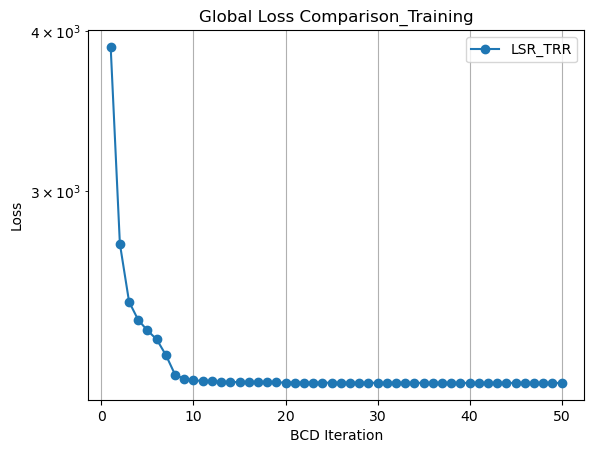

Final Objective Function Value CLOSED: [2123.2978386]


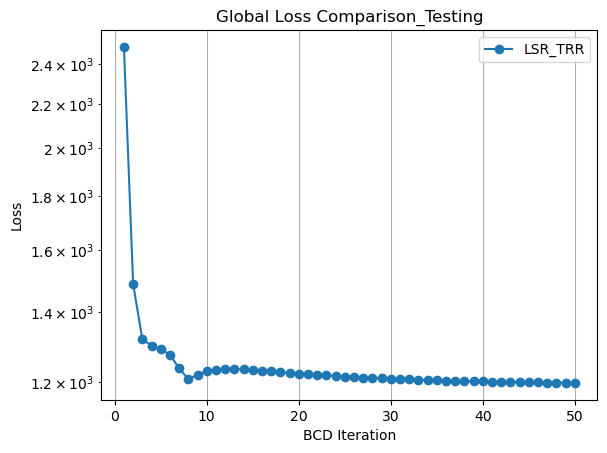

Final Objective Function Value CLOSED: 1198.2367531121026


In [22]:
# Training

training_objective_function_values = objective_function_values[:, 0, 2].reshape(-1, 1)

plt.figure()
# Plotting closed form solver
plt.plot(
    range(1, len(training_objective_function_values) + 1),
    training_objective_function_values,
    label="LSR_TRR",
    marker="o",
)

# Setting the title and labels
plt.title("Global Loss Comparison_Training")
plt.yscale("log")
plt.xlabel("BCD Iteration")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
# Adding a legend to distinguish the two plots
plt.legend()
# Display the plot
plt.show()

print("Final Objective Function Value CLOSED:", training_objective_function_values[-1])
 
#testing

def test_loss_at_train_iter(X_test,Y_test,best_lambda,factor_core_iteration,b=None):
    from optimization import objective_function_tensor_sep

    Y_test = Y_test - np.mean(Y_test)
    objective_function_test = []

    for i in range(len(factor_core_iteration)):
        lsr_ten = factor_core_iteration[i]
        expanded_lsr = lsr_ten.expand_to_tensor()
        objective_function_value = objective_function_tensor_sep(Y_test,X_test,expanded_lsr,lsr_ten,best_lambda,b = None)
        objective_function_test.append(objective_function_value)
    return objective_function_test

# plotting testing loss
test_objective_function_values = test_loss_at_train_iter(X_test,Y_test,lambda1,reconstructed_tensor,b=None)

plt.figure()
# Plotting closed form solver
plt.plot(
    range(1, len(test_objective_function_values) + 1),
    test_objective_function_values,
    label="LSR_TRR",
    marker="o",
)

# Setting the title and labels
plt.title("Global Loss Comparison_Testing")
plt.yscale("log")
plt.xlabel("BCD Iteration")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
# Adding a legend to distinguish the two plots
plt.legend()
# Display the plot
plt.show()

print("Final Objective Function Value CLOSED:", test_objective_function_values[-1])




#### Gradient Plots

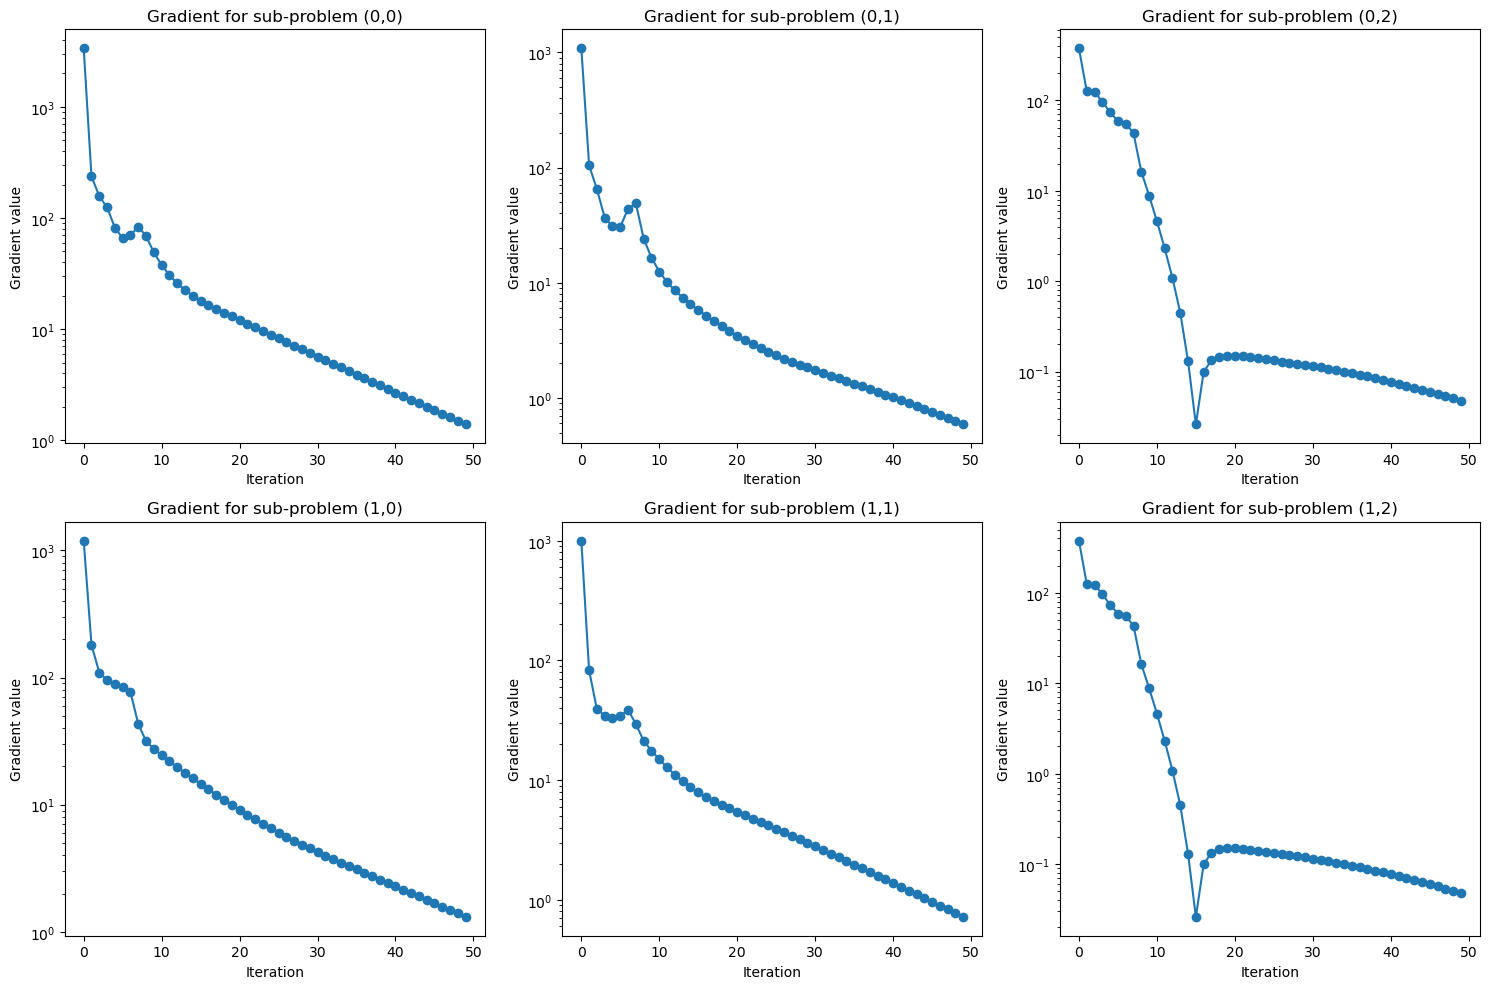

In [46]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Determine the number of rows and columns for subplots
num_rows = 2#len(iterate_level_values)
num_cols = 3#len(iterate_level_values[0]) if num_rows > 0 else 0

# Iterate over each subplot
for i in range(num_rows):
    for j in range(num_cols):
        axs[i, j].plot(gradient_values[:, i, j],marker = 'o')
        axs[i, j].set_title(f'Gradient for sub-problem ({i},{j})')
        axs[i, j].set_xlabel('Iteration')
        axs[i, j].set_ylabel('Gradient value')
        axs[i,j].set_yscale('log')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Iterate Difference 

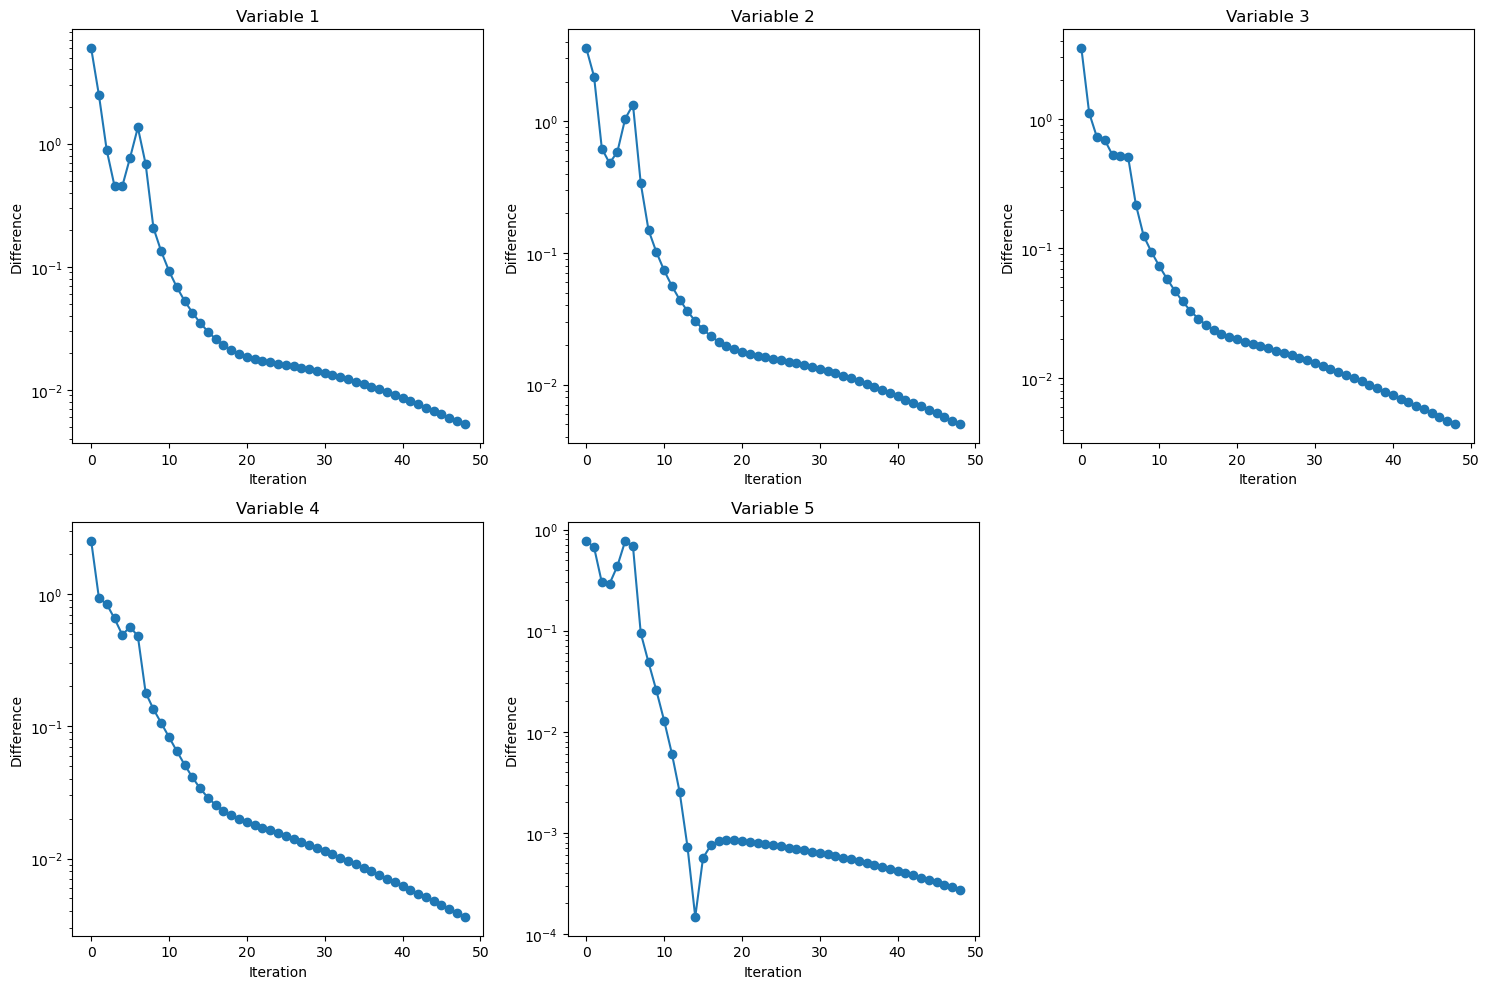

In [45]:
# factor matrix

def iterate_diff(lsr_tensor_over_iterates):
    diff_iter = []

    #iterating over the iterations 
    for i in range(1,len(lsr_tensor_over_iterates)):
        diff_iter_inside = []
        diff_core = 0
        diff = 0
        norm_diff = 0
        lsr_tensor_prior = lsr_tensor_over_iterates[i-1]
        lsr_tensor_post  = lsr_tensor_over_iterates[i]
        #iterating over separation ranks
        for s in range(len(lsr_tensor_over_iterates[0].factor_matrices)):
            #iterating over modes 
            for k in range(len(lsr_tensor_over_iterates[0].factor_matrices[0])):
                diff = lsr_tensor_post.factor_matrices[s][k] - lsr_tensor_prior.factor_matrices[s][k]
                norm_diff = np.linalg.norm(diff,ord='fro')
                diff_iter_inside.append(norm_diff)

        diff_core = lsr_tensor_post.core_tensor - lsr_tensor_prior.core_tensor
        norm_diff_core = np.linalg.norm(diff_core, ord = 'fro')
        diff_iter_inside.append(norm_diff_core)

        diff_iter.append(diff_iter_inside)
    return diff_iter 
    
#finding the difference
diff_iter = iterate_diff(reconstructed_tensor)

rows = 2
columns = 3
num_variables = 5


# Determine the number of rows needed
num_cols = 3
num_rows = (num_variables + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration if it's 2D
axes = axes.flatten()

#making diff_iter a numpy array
diff_iter = np.array(diff_iter)
for i in range(num_variables):
    ax = axes[i]
    ax.plot(diff_iter[:,i],marker = 'o')
    ax.set_title(f'Variable {i+1}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Difference')
    ax.set_yscale('log')

# Hide any unused subplots
for j in range(num_variables, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()











In [40]:

print(iterate_diff[:][0])




TypeError: 'function' object is not subscriptable

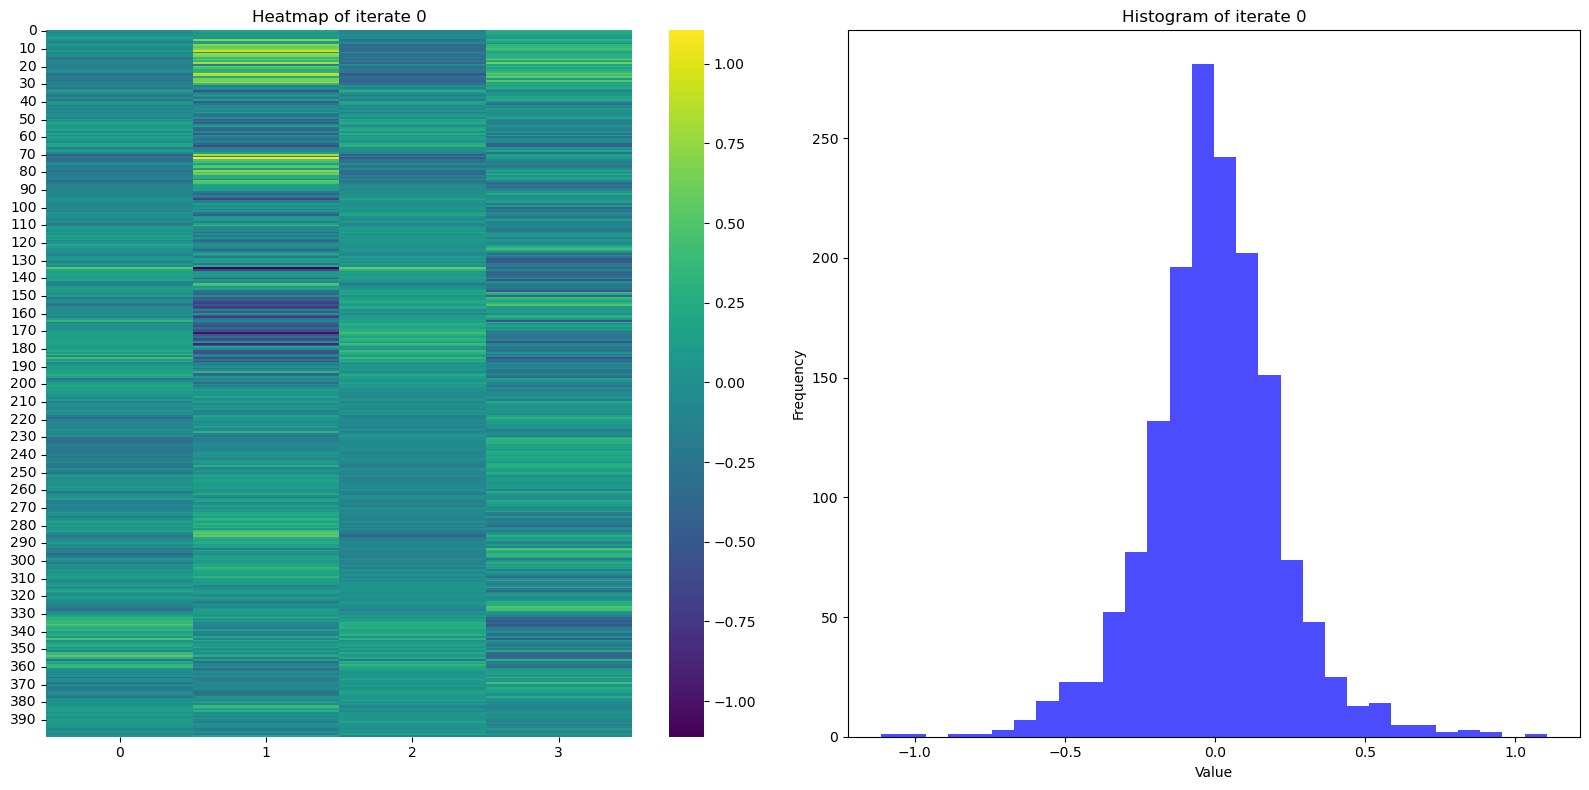

Energy of iterate 0: 8.866709188801869


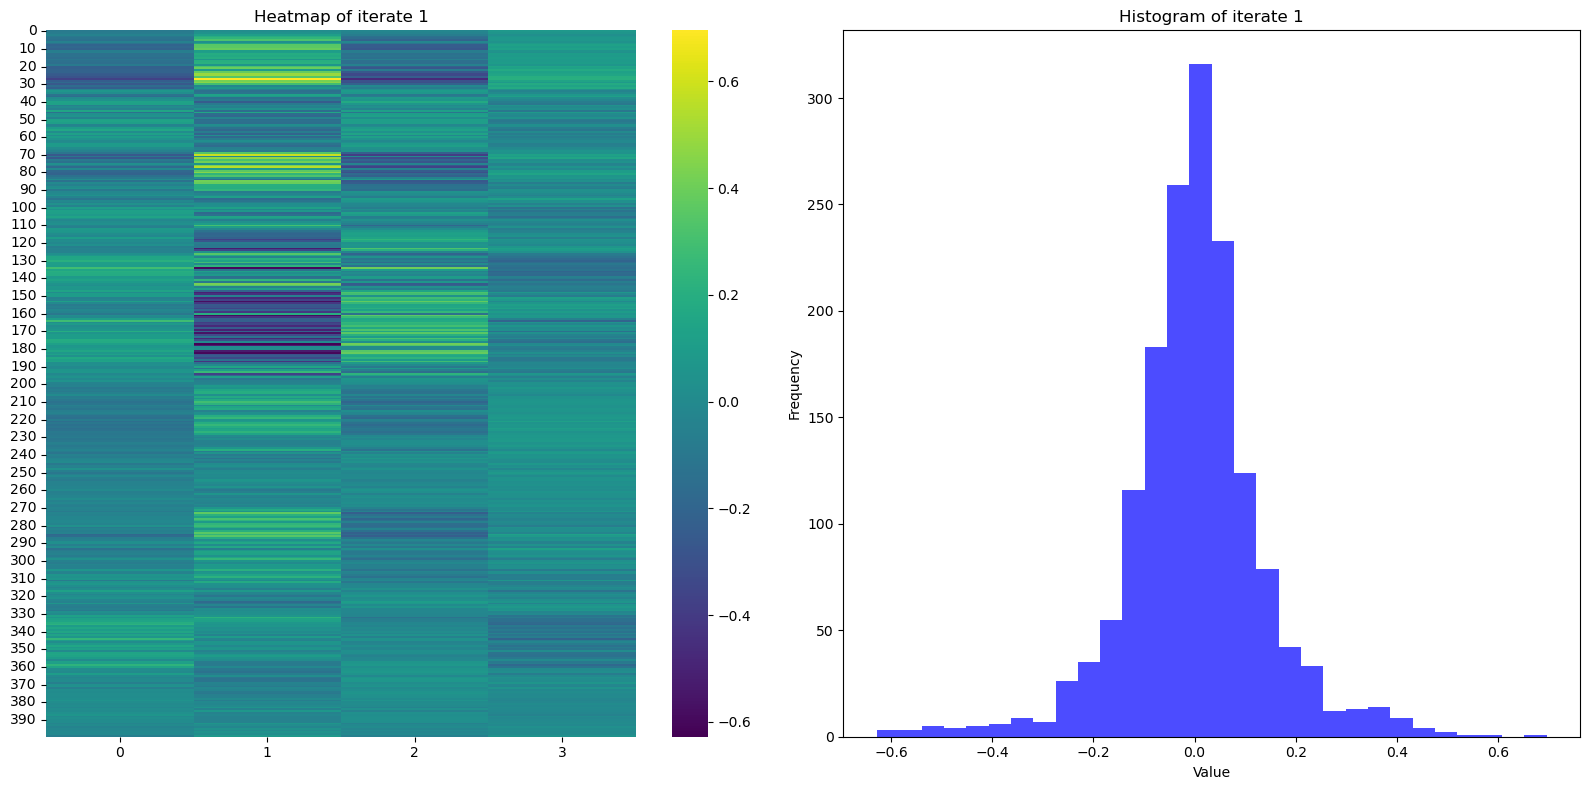

Energy of iterate 1: 5.519360918006139


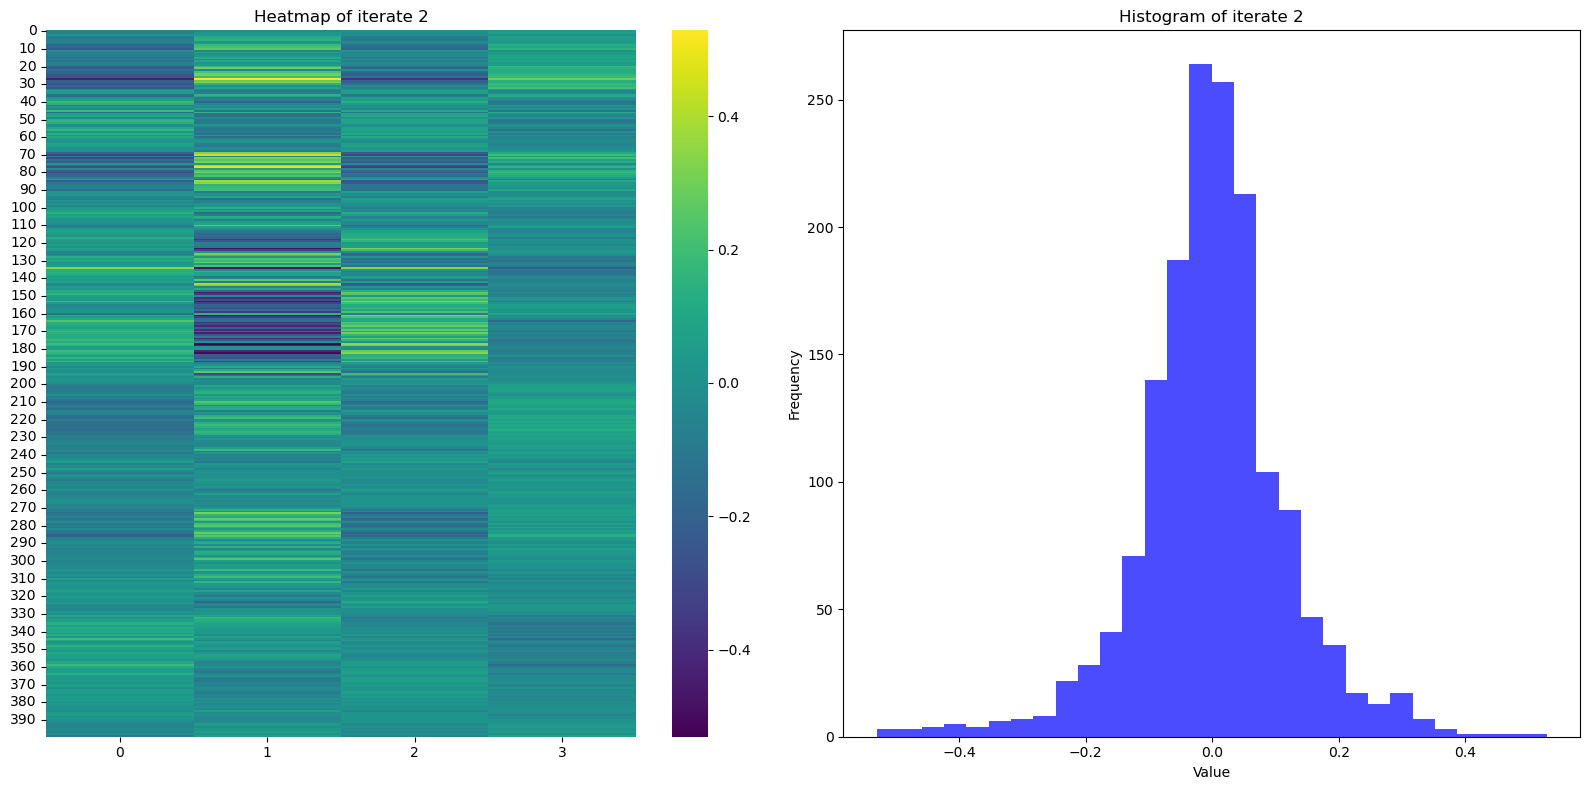

Energy of iterate 2: 4.713458422519798


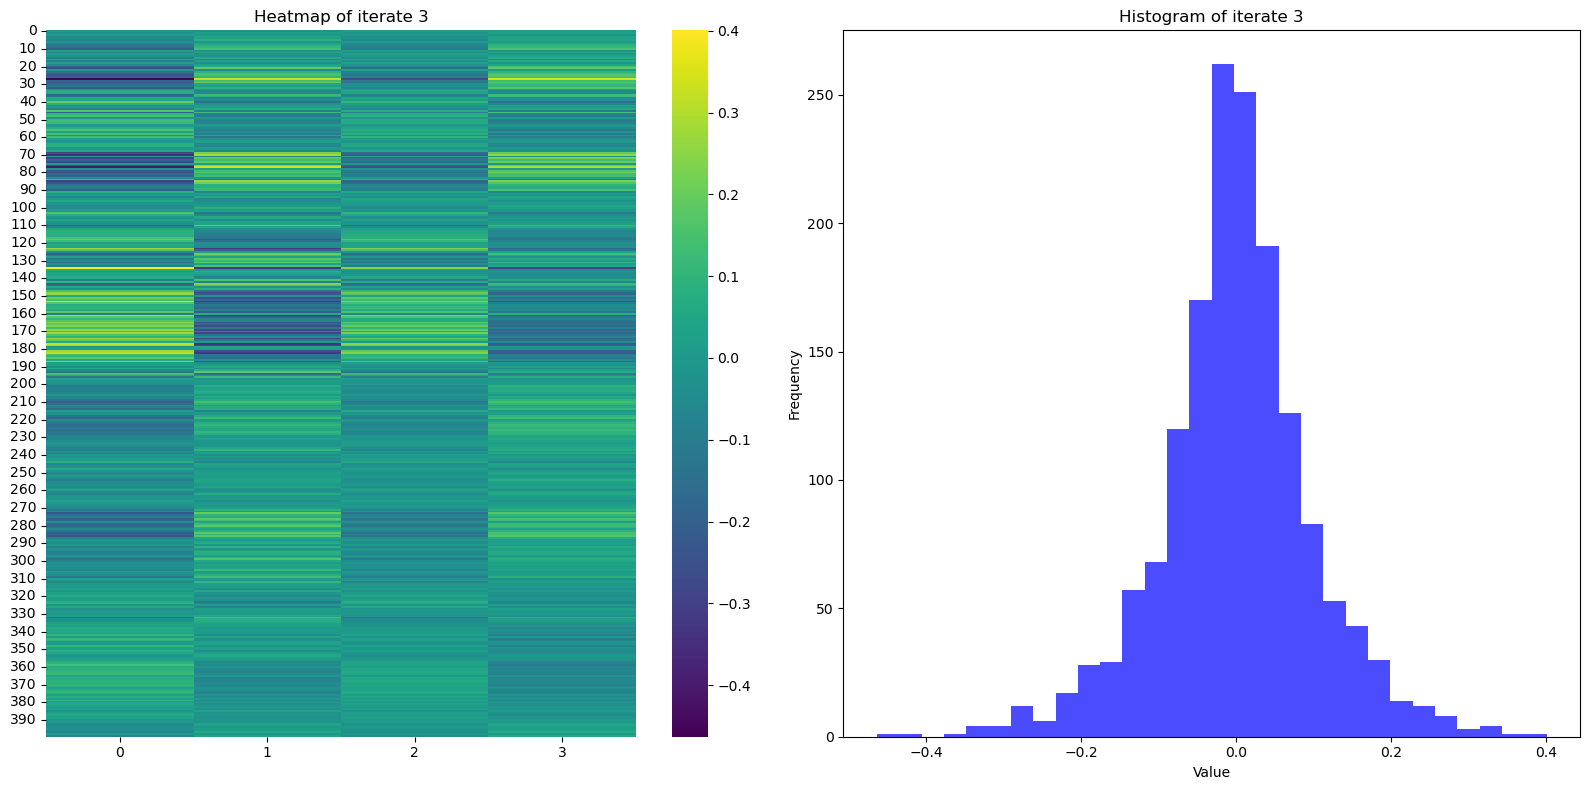

Energy of iterate 3: 3.9311963992659362


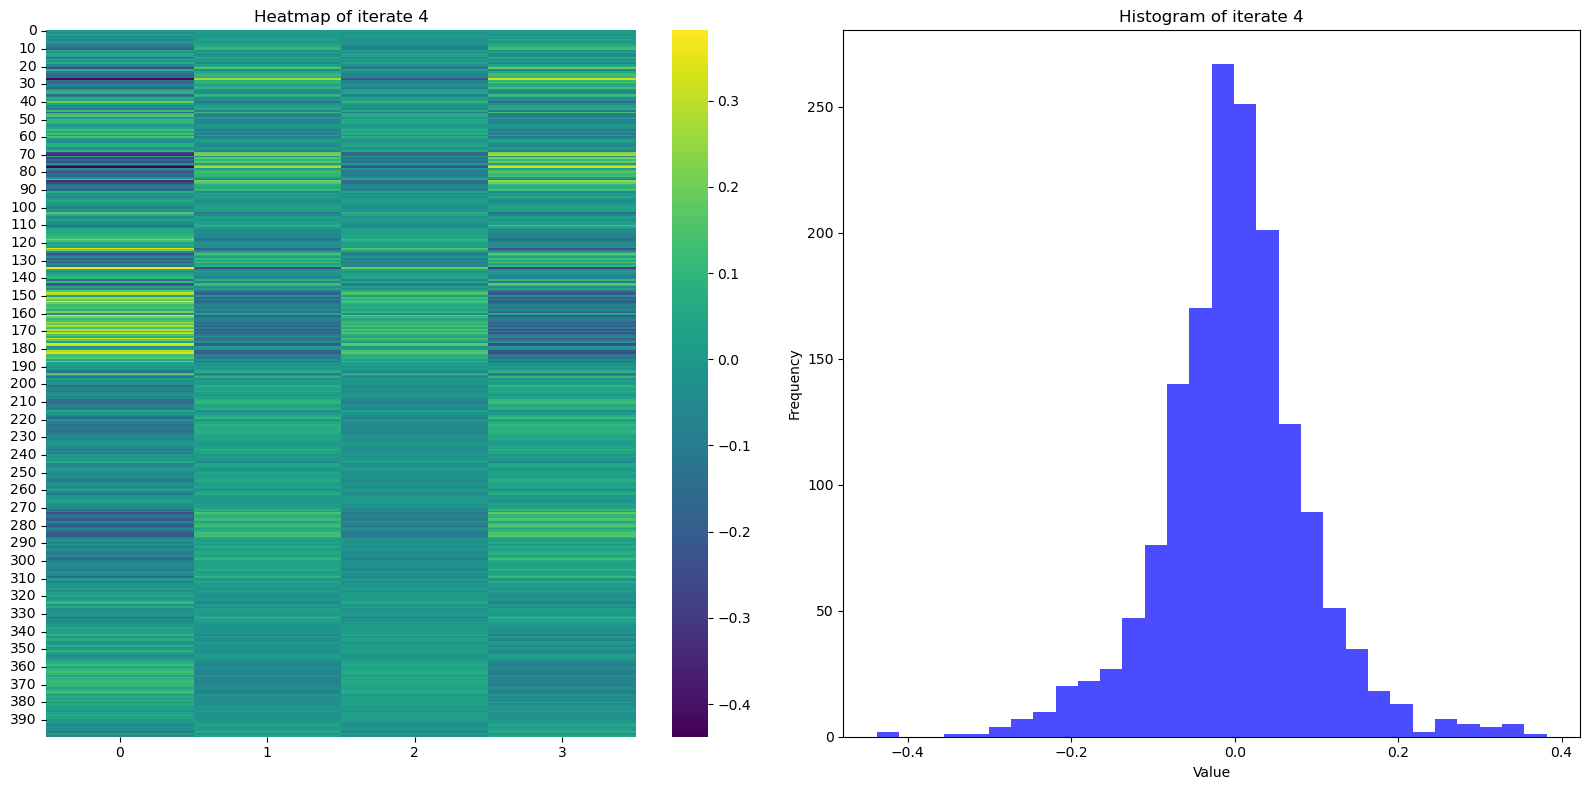

Energy of iterate 4: 3.6149379187522617


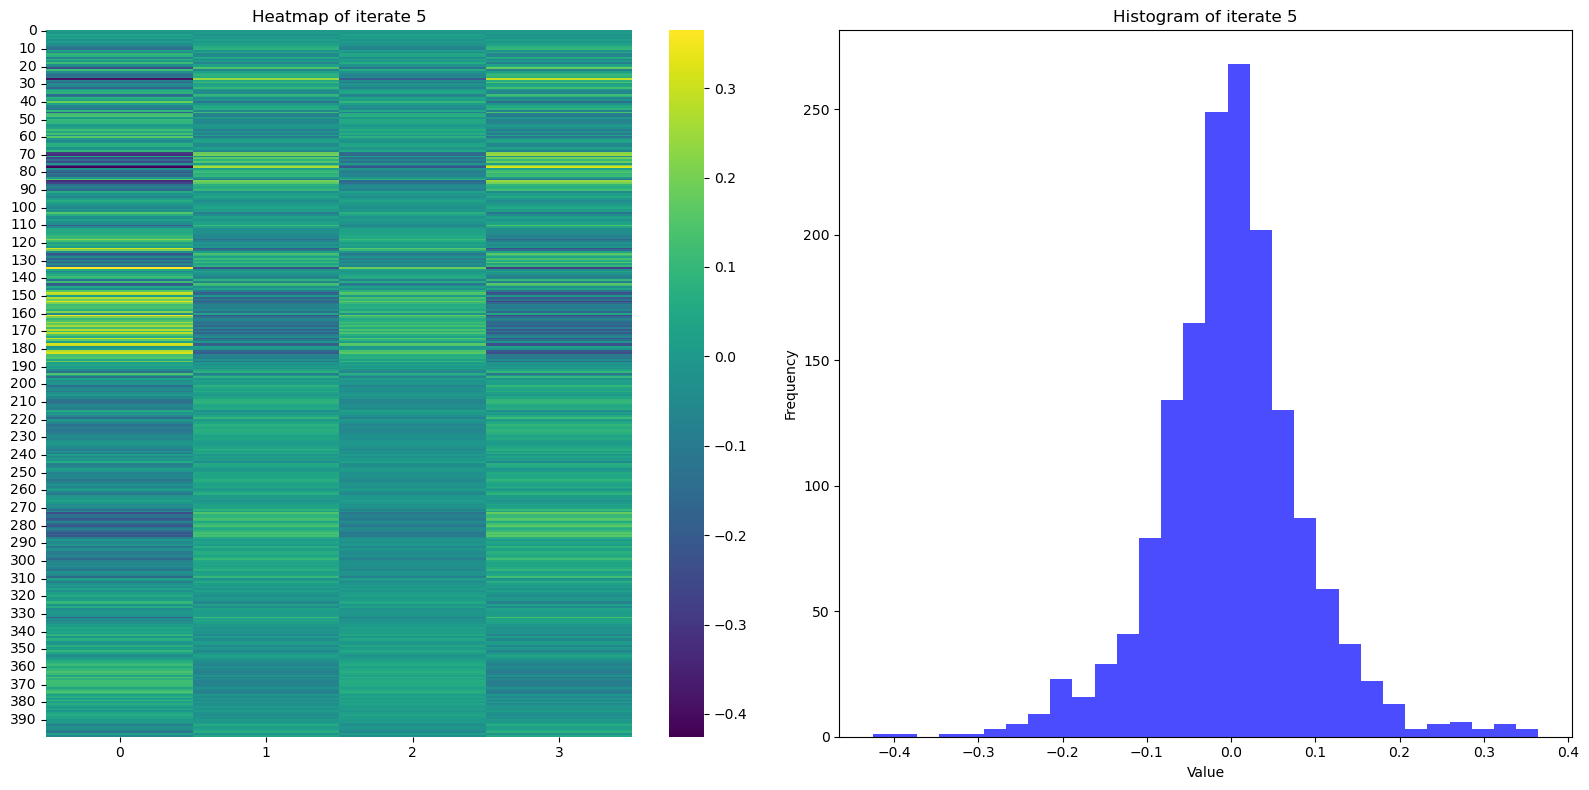

Energy of iterate 5: 3.4752227984351065


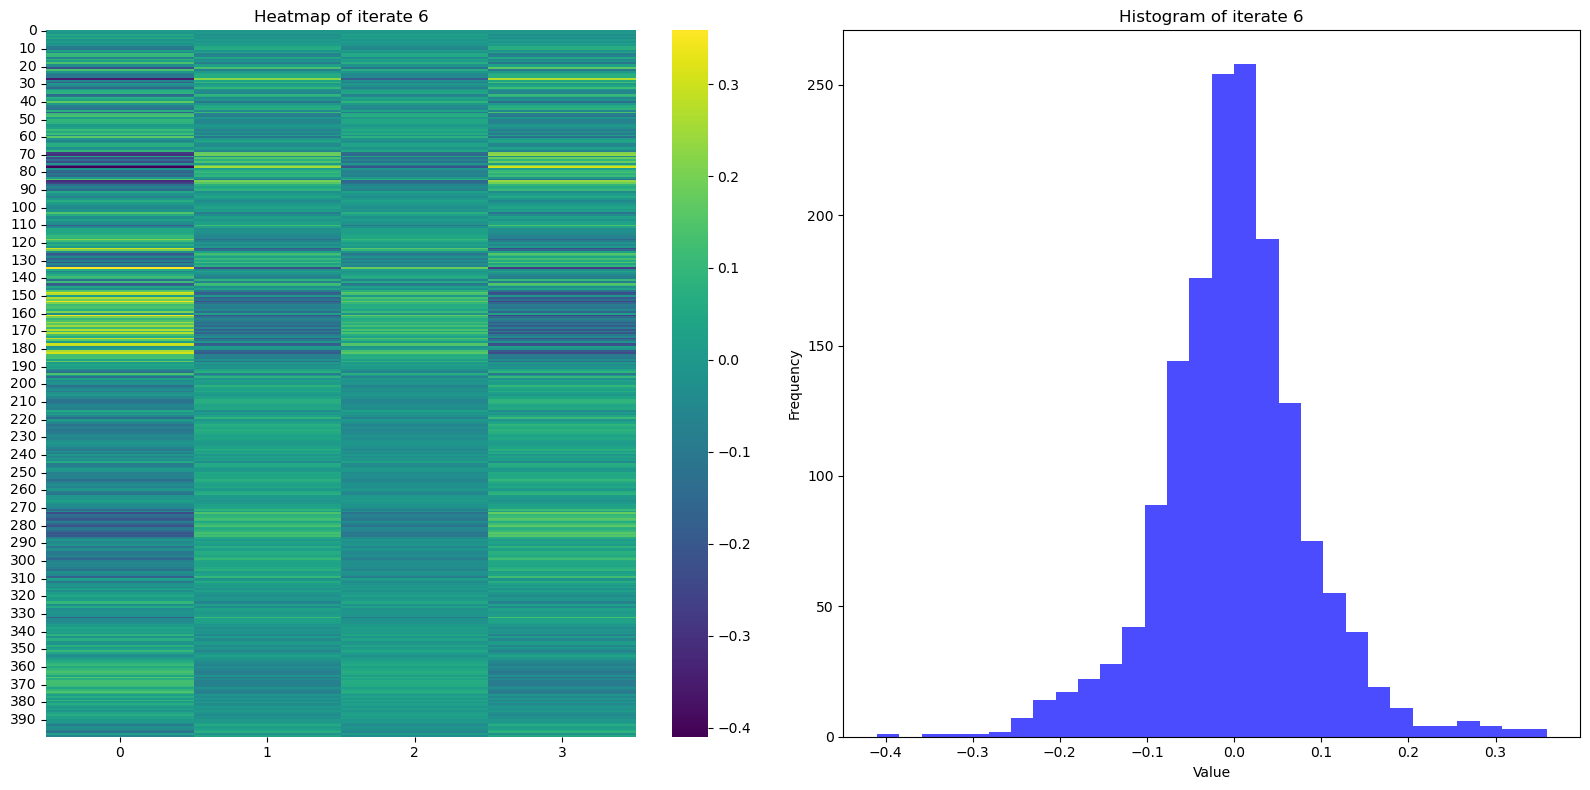

Energy of iterate 6: 3.3695762325526935


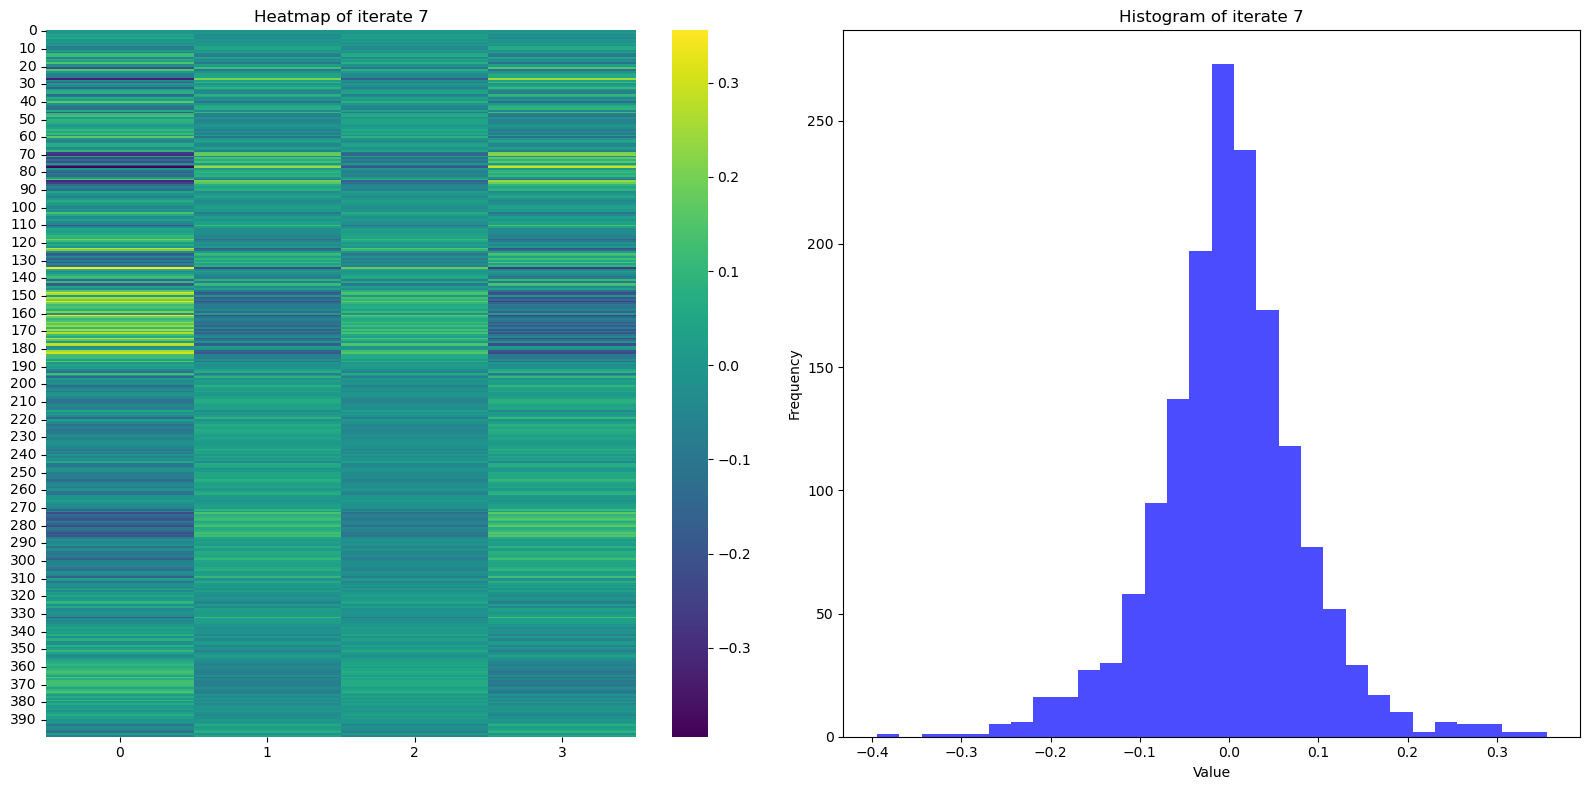

Energy of iterate 7: 3.289272797971848


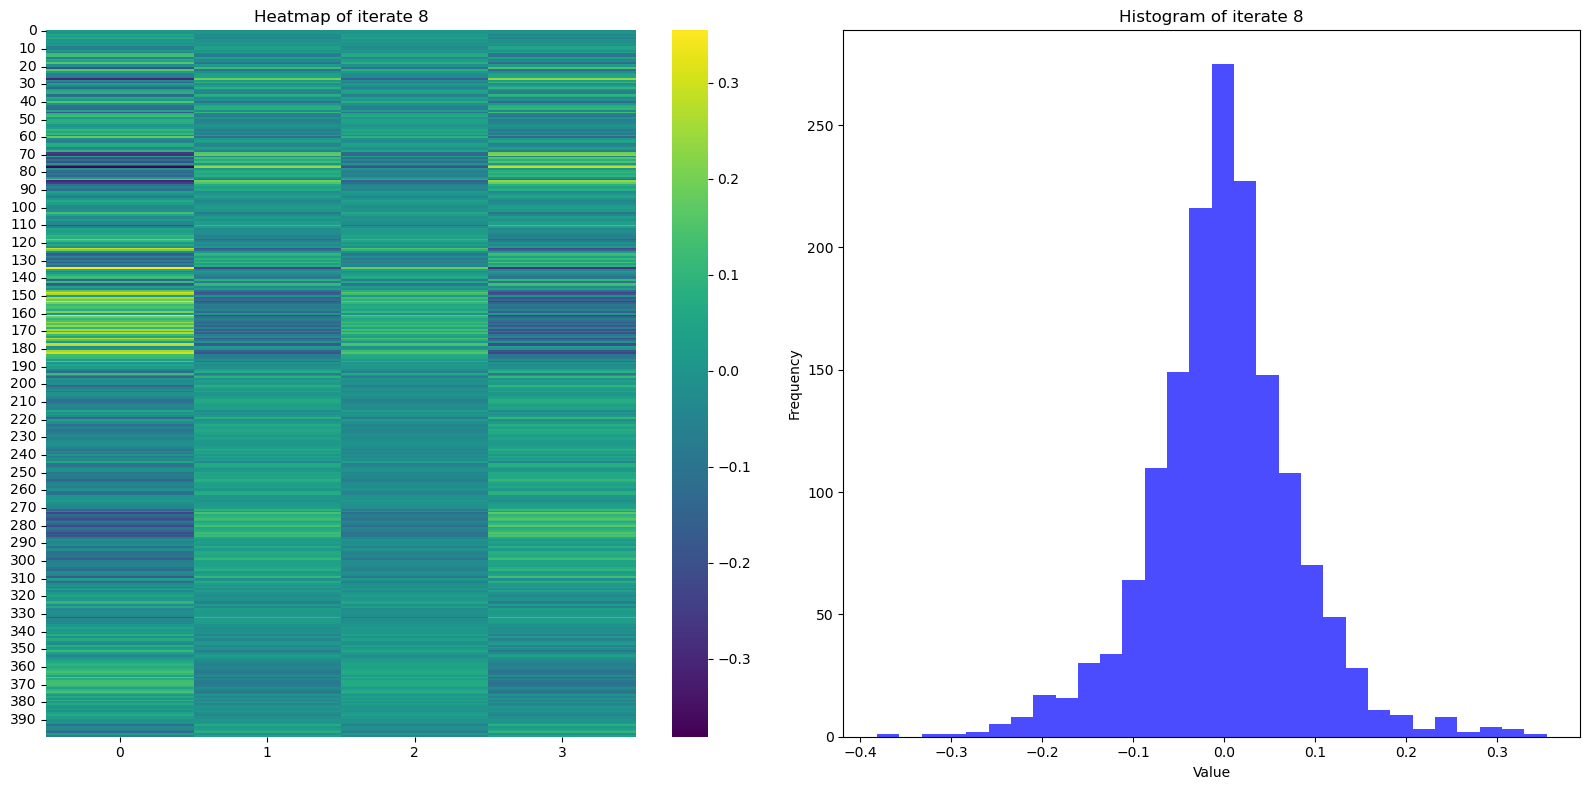

Energy of iterate 8: 3.2306338846985234


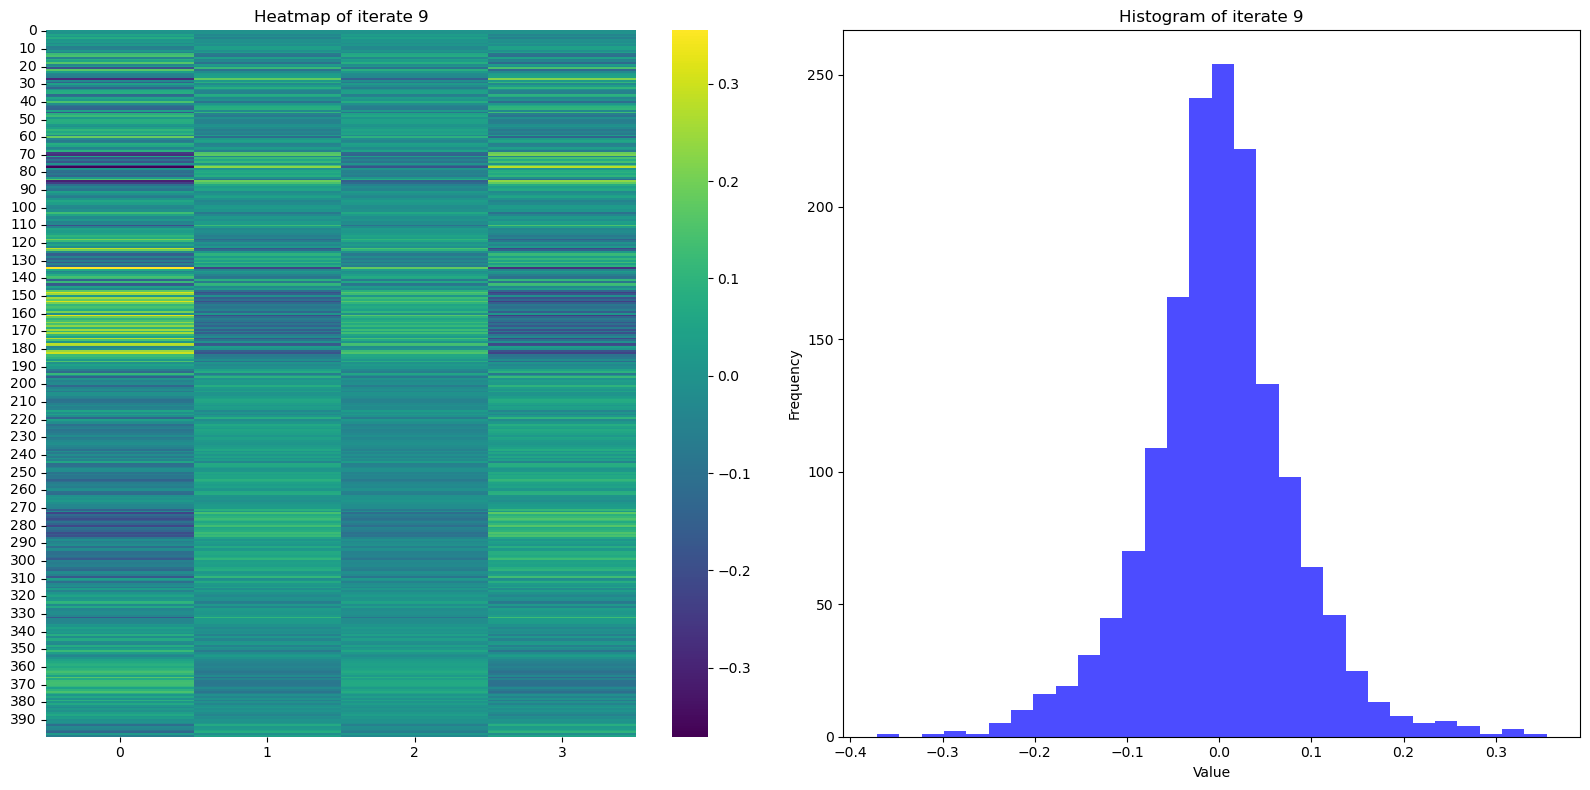

Energy of iterate 9: 3.1885552986399106


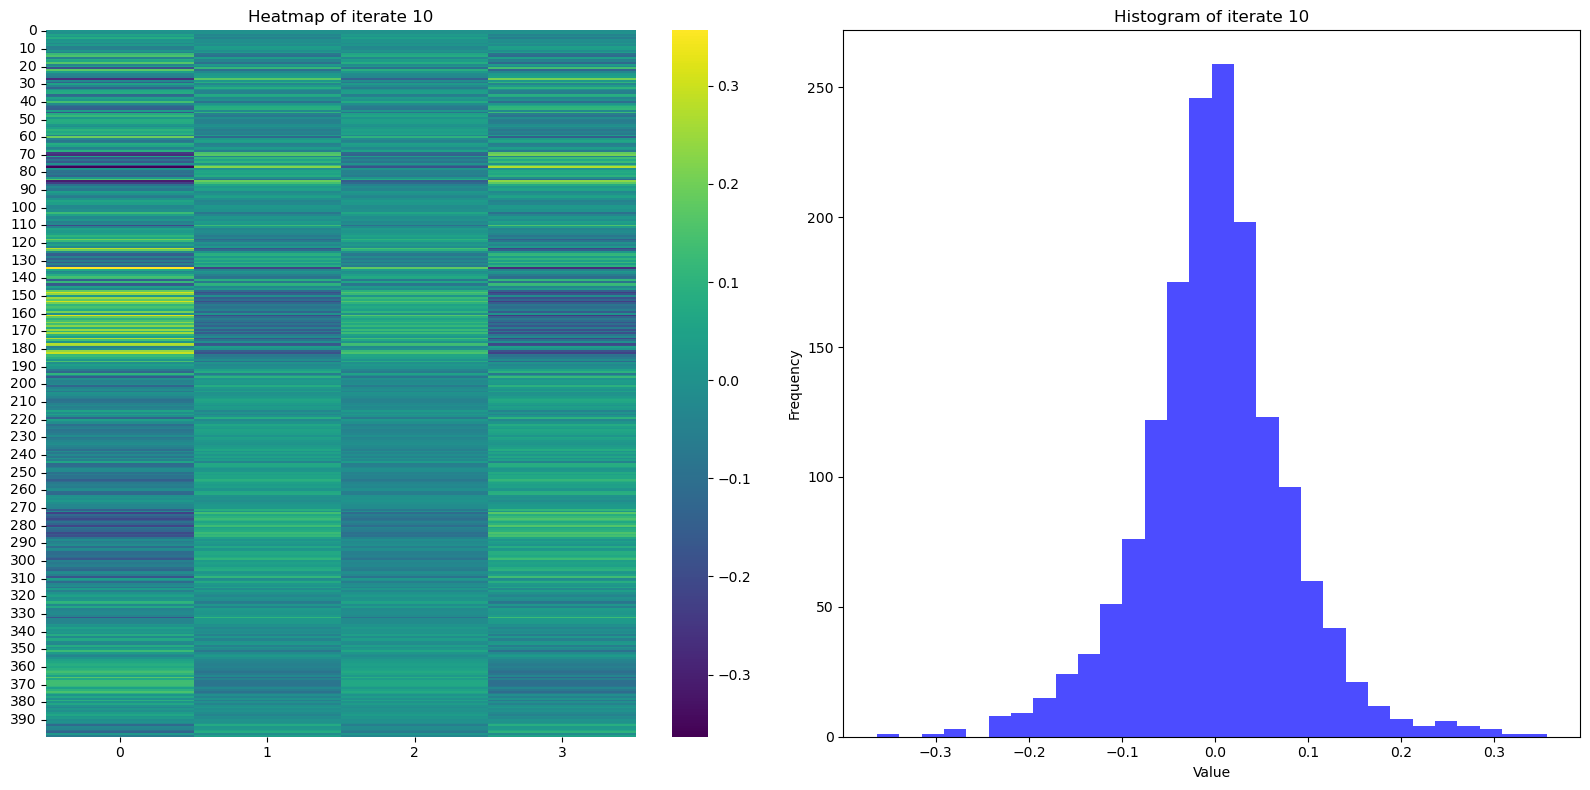

Energy of iterate 10: 3.1581527014842594


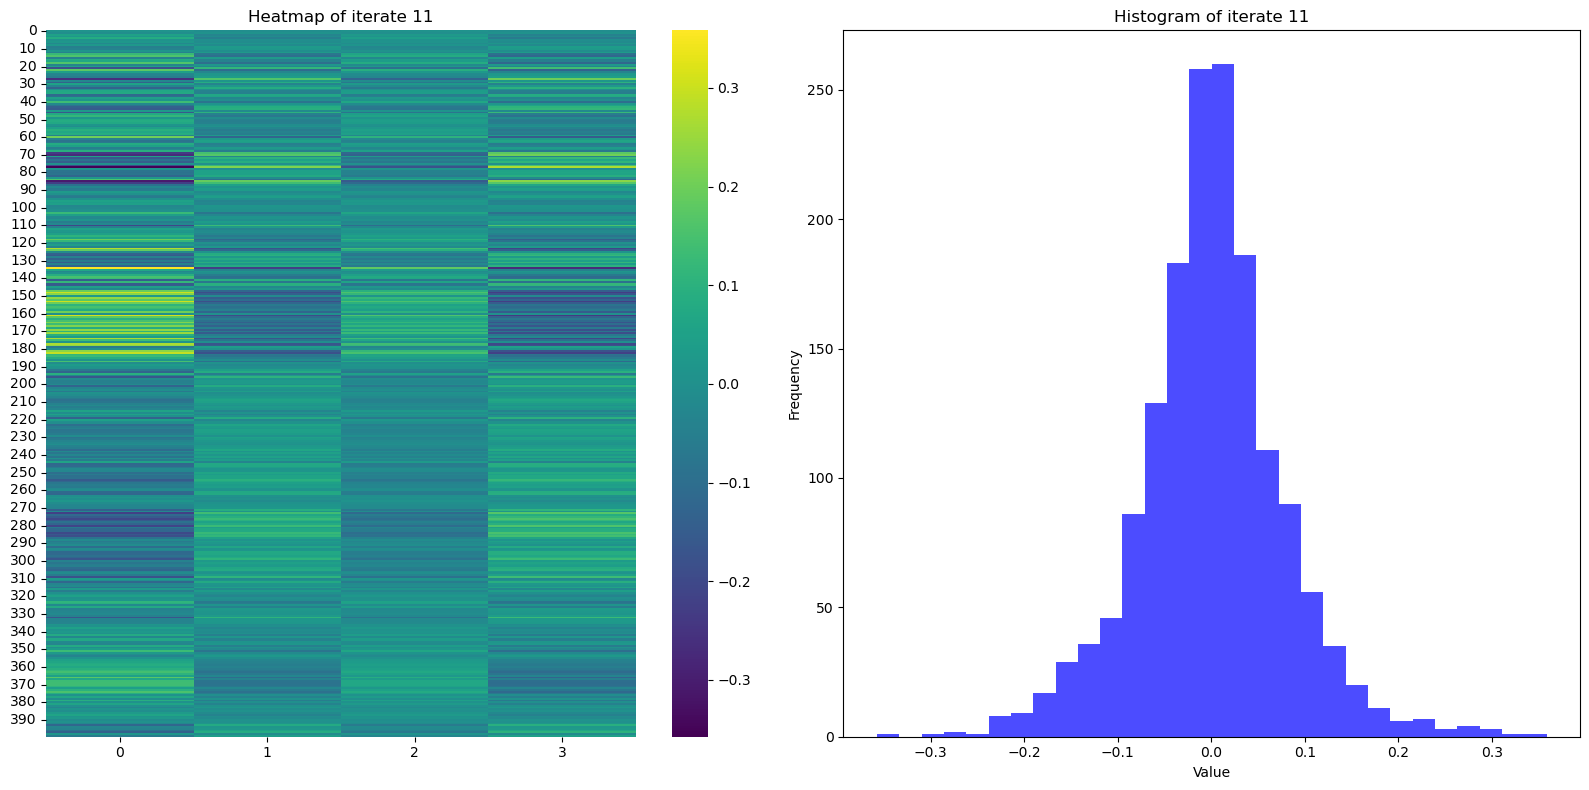

Energy of iterate 11: 3.135671926333564


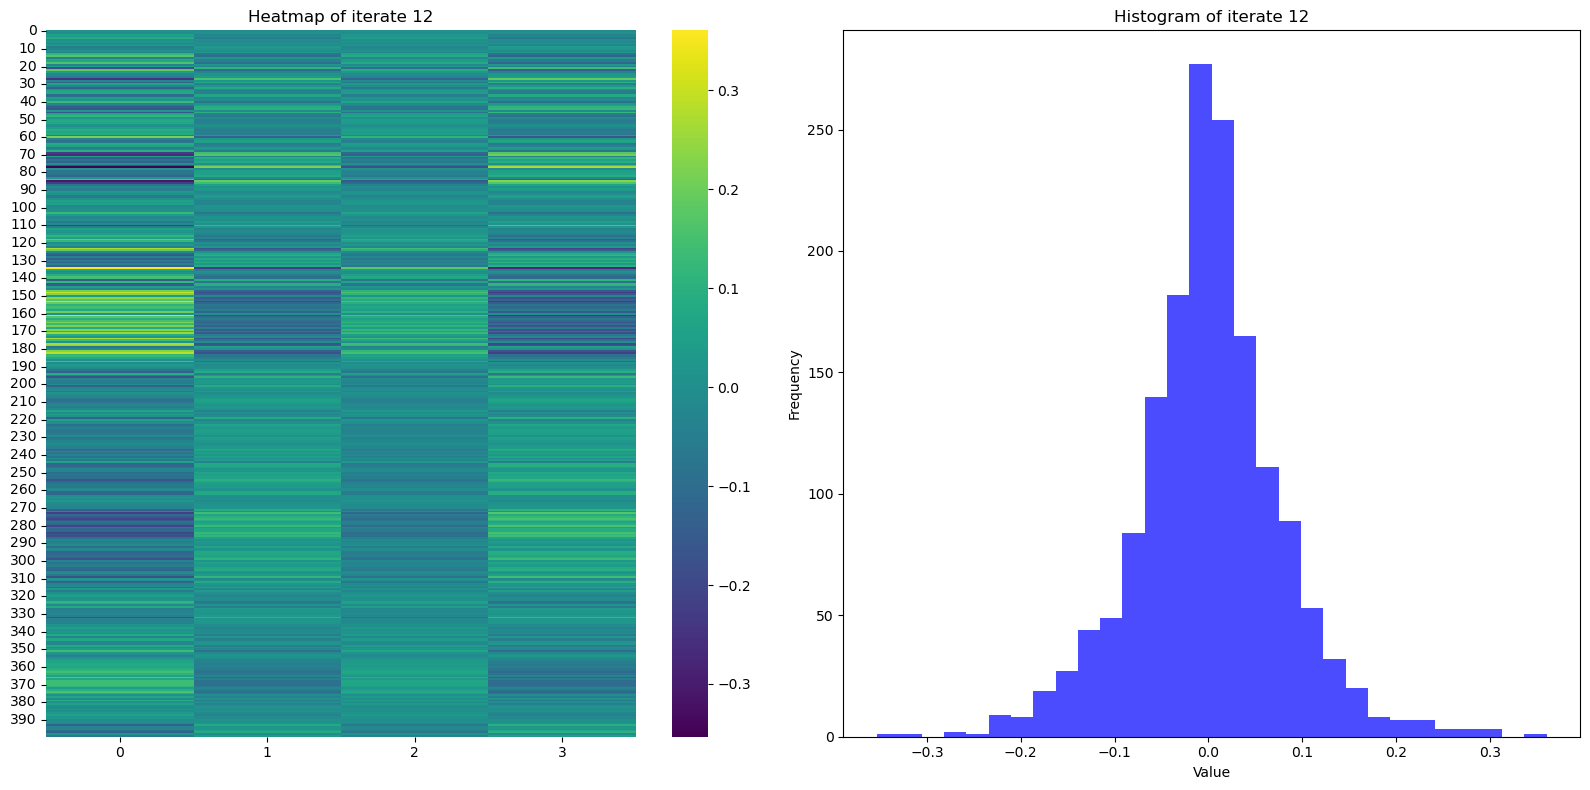

Energy of iterate 12: 3.118533559232478


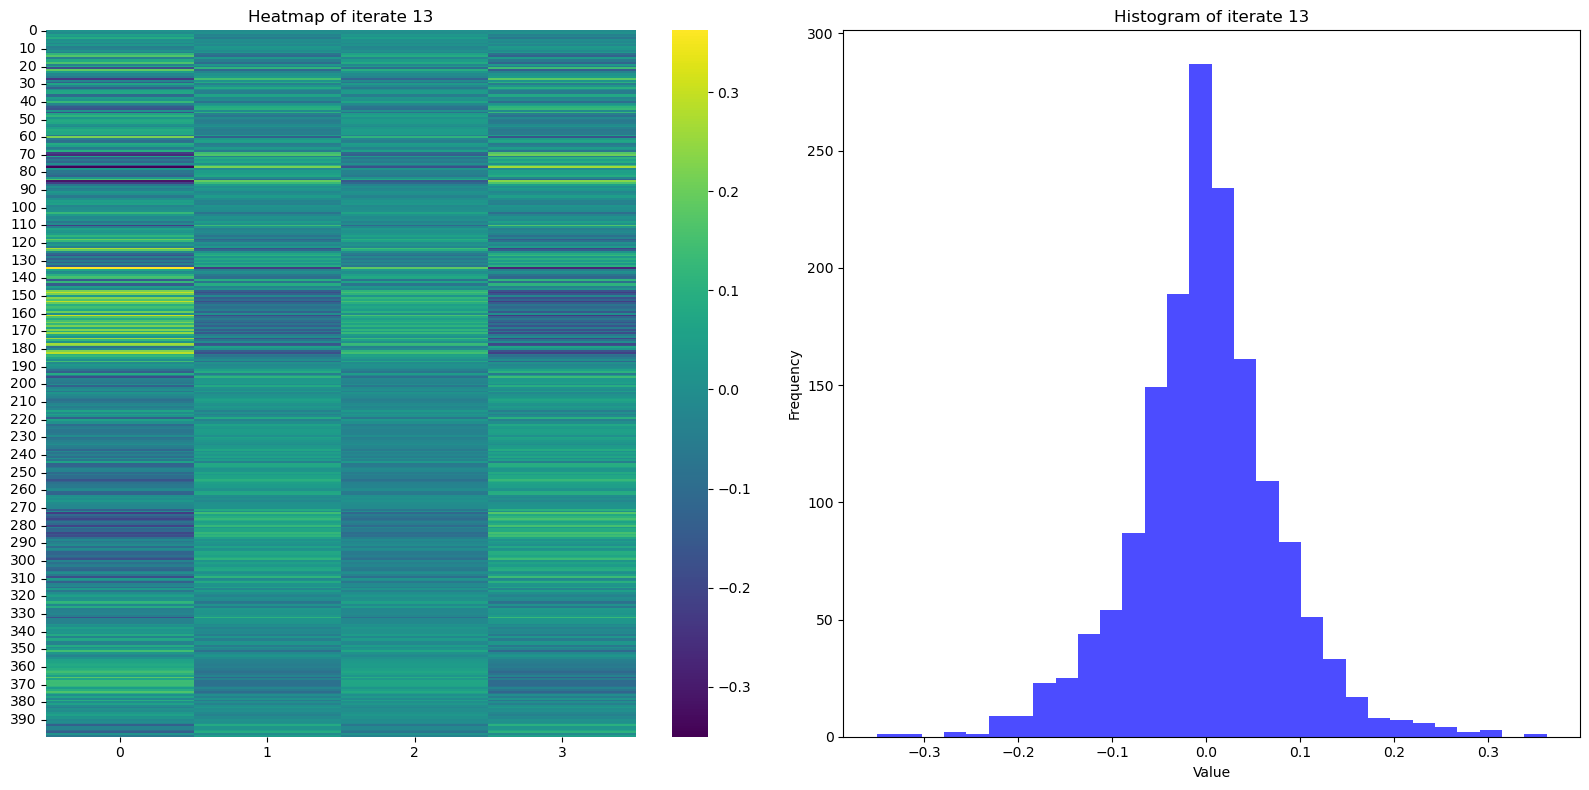

Energy of iterate 13: 3.105082587435593


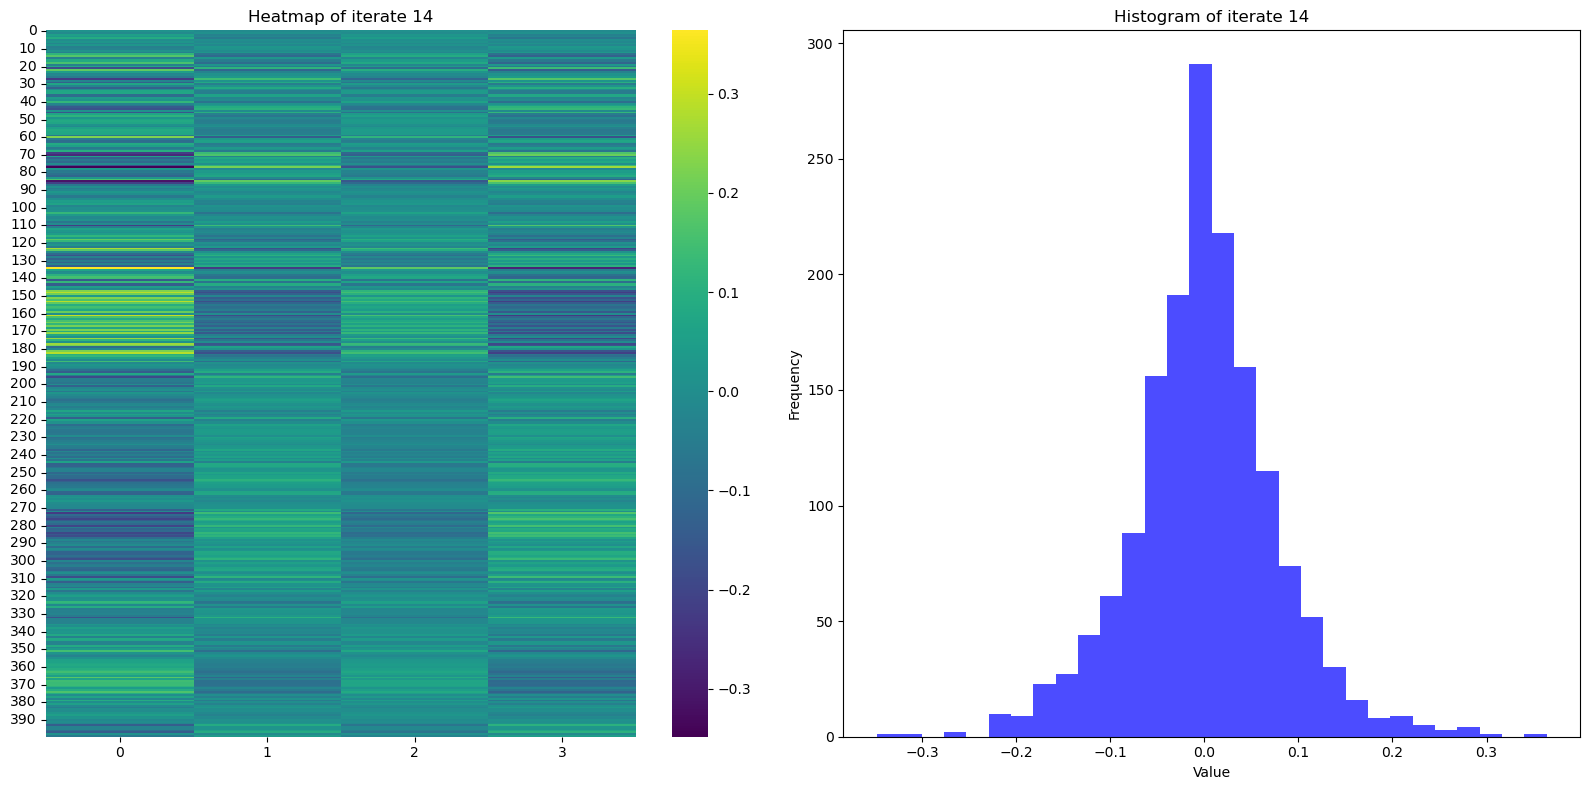

Energy of iterate 14: 3.094296005346803


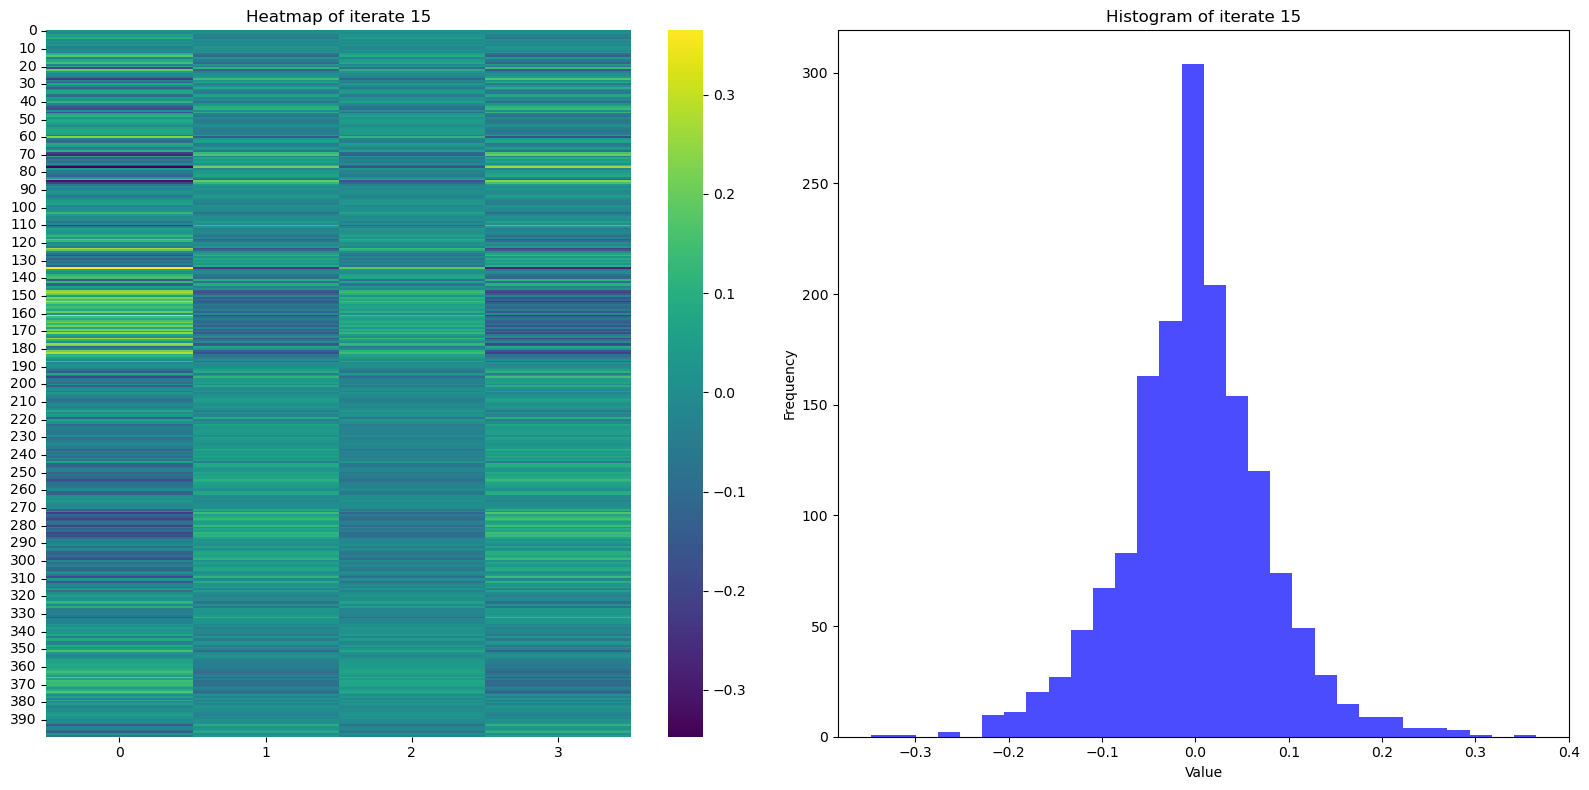

Energy of iterate 15: 3.08554133977958


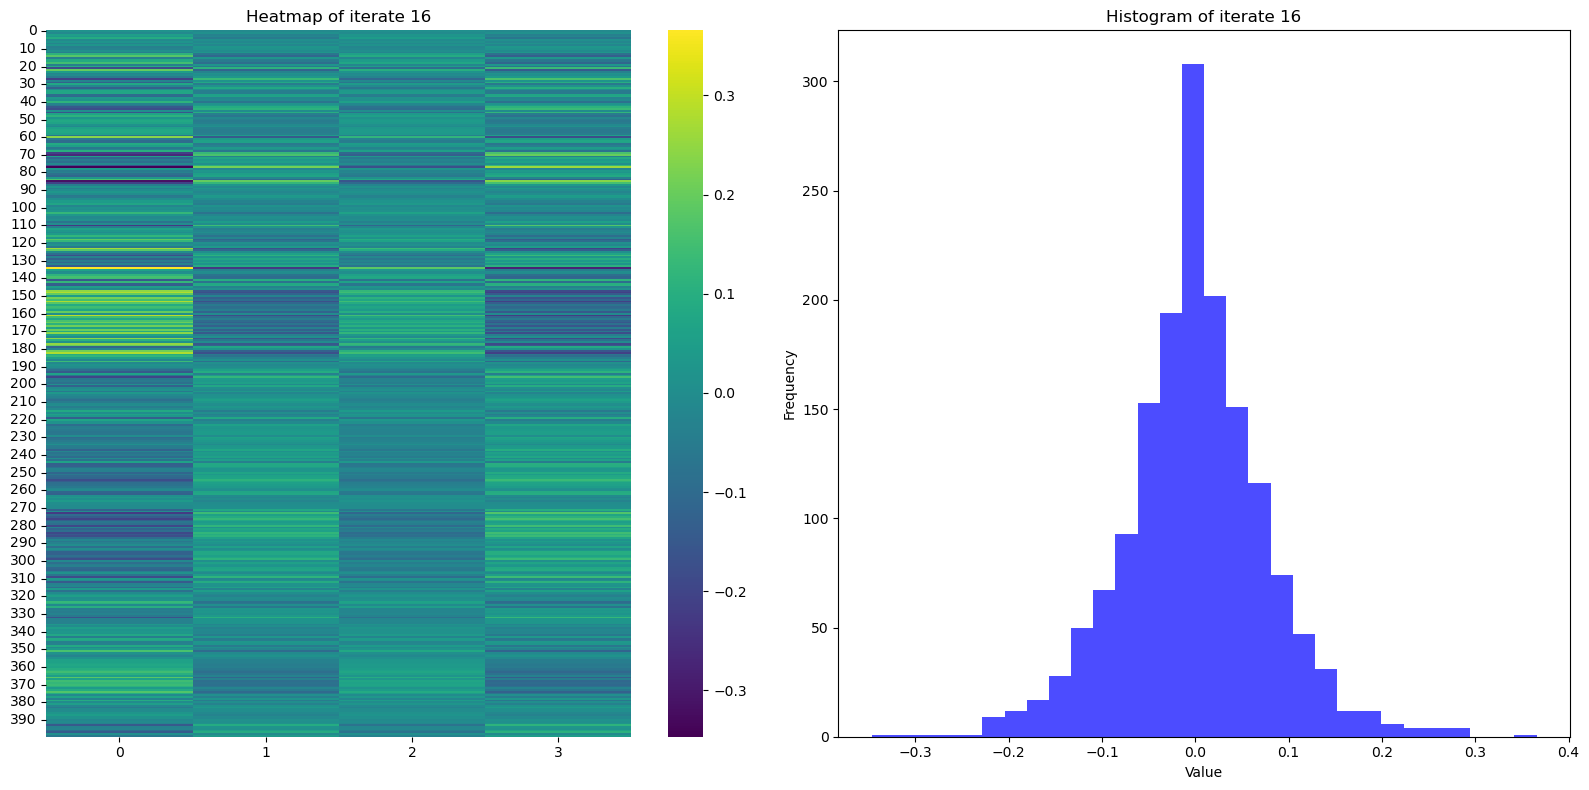

Energy of iterate 16: 3.078412093965087


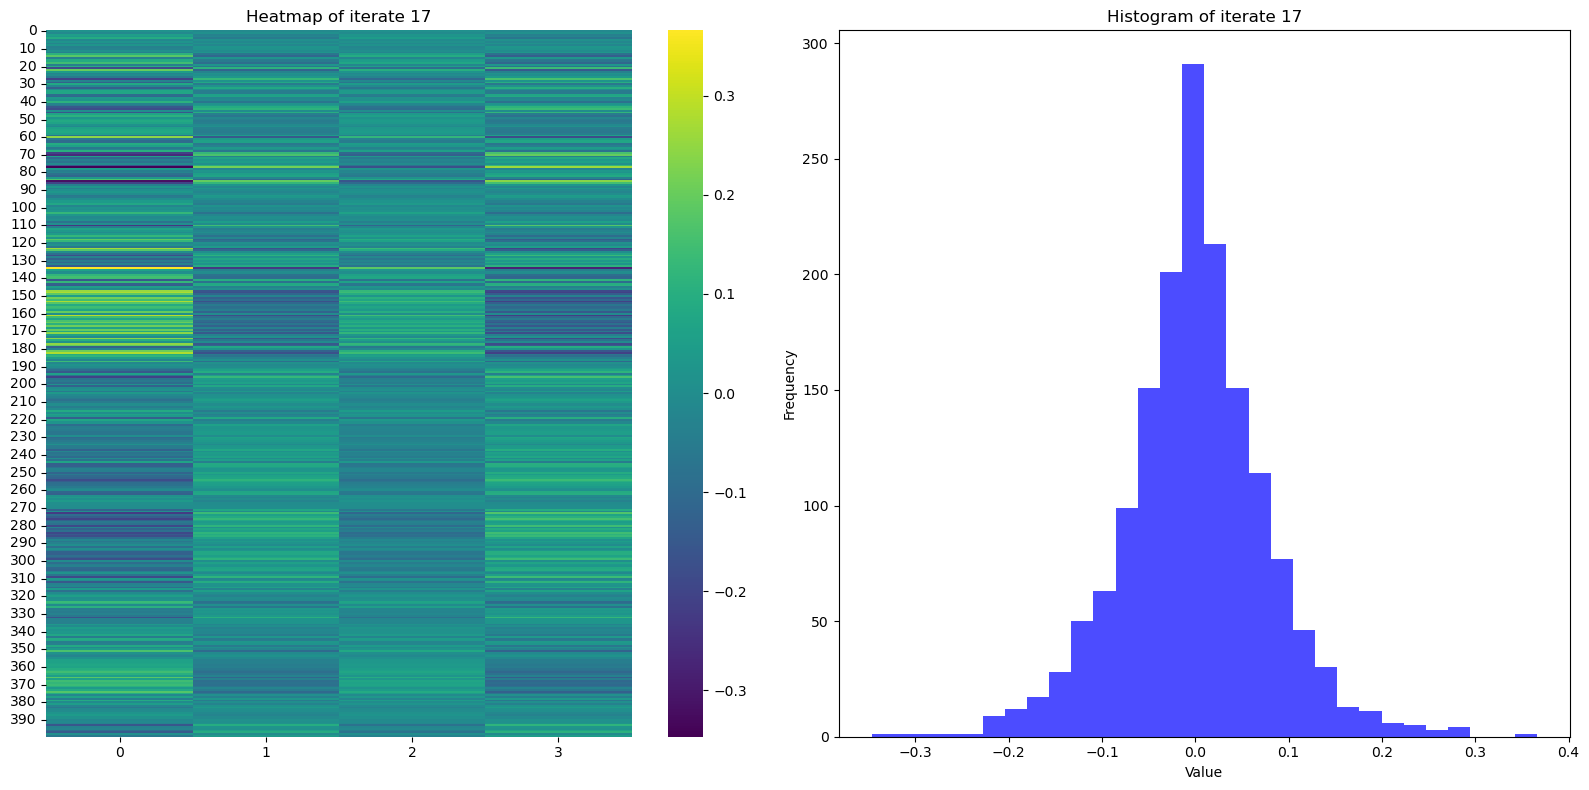

Energy of iterate 17: 3.0726318204430605


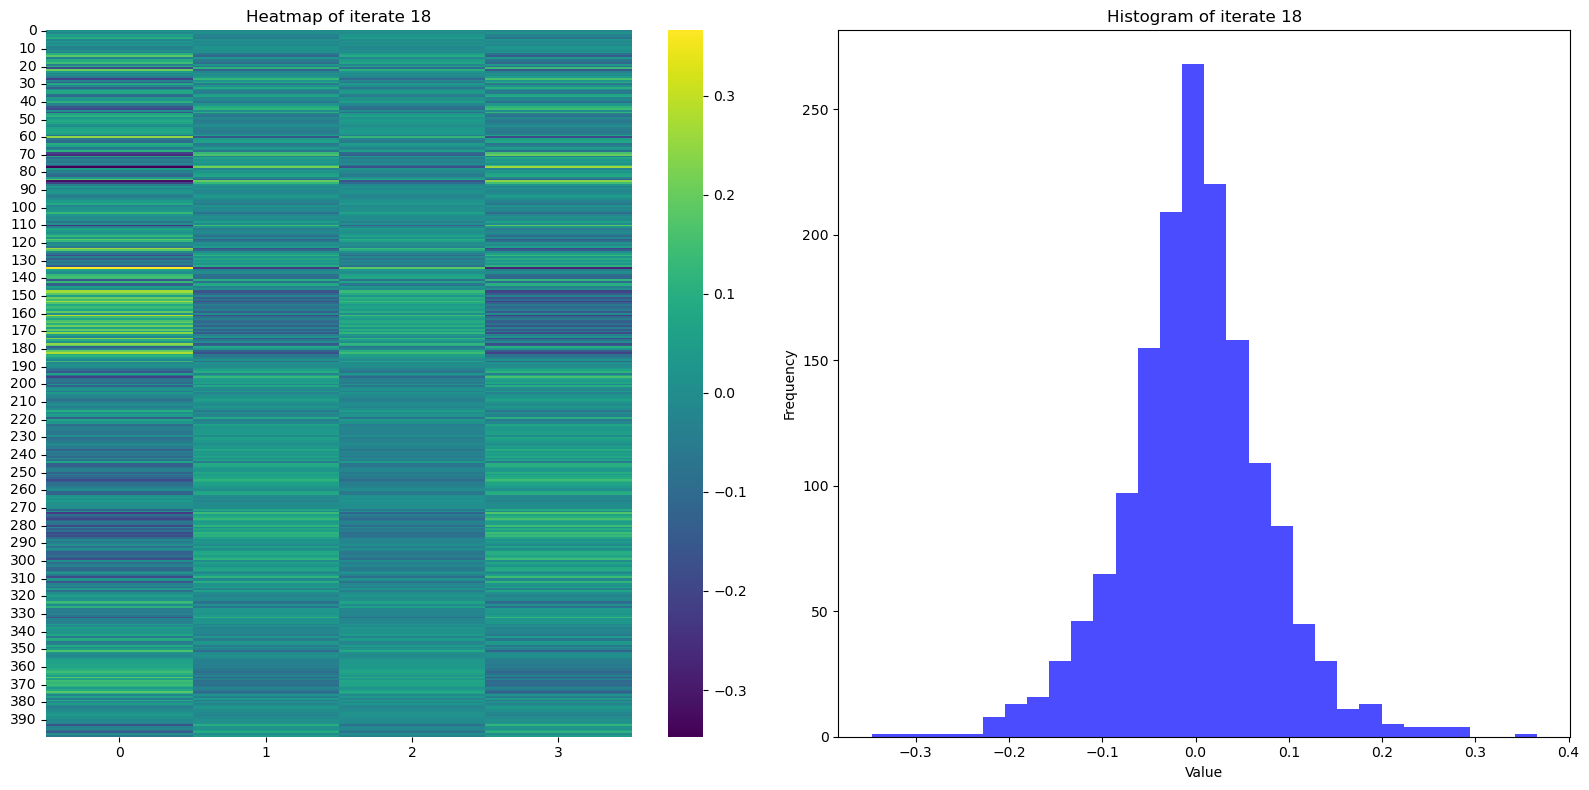

Energy of iterate 18: 3.068004262221418


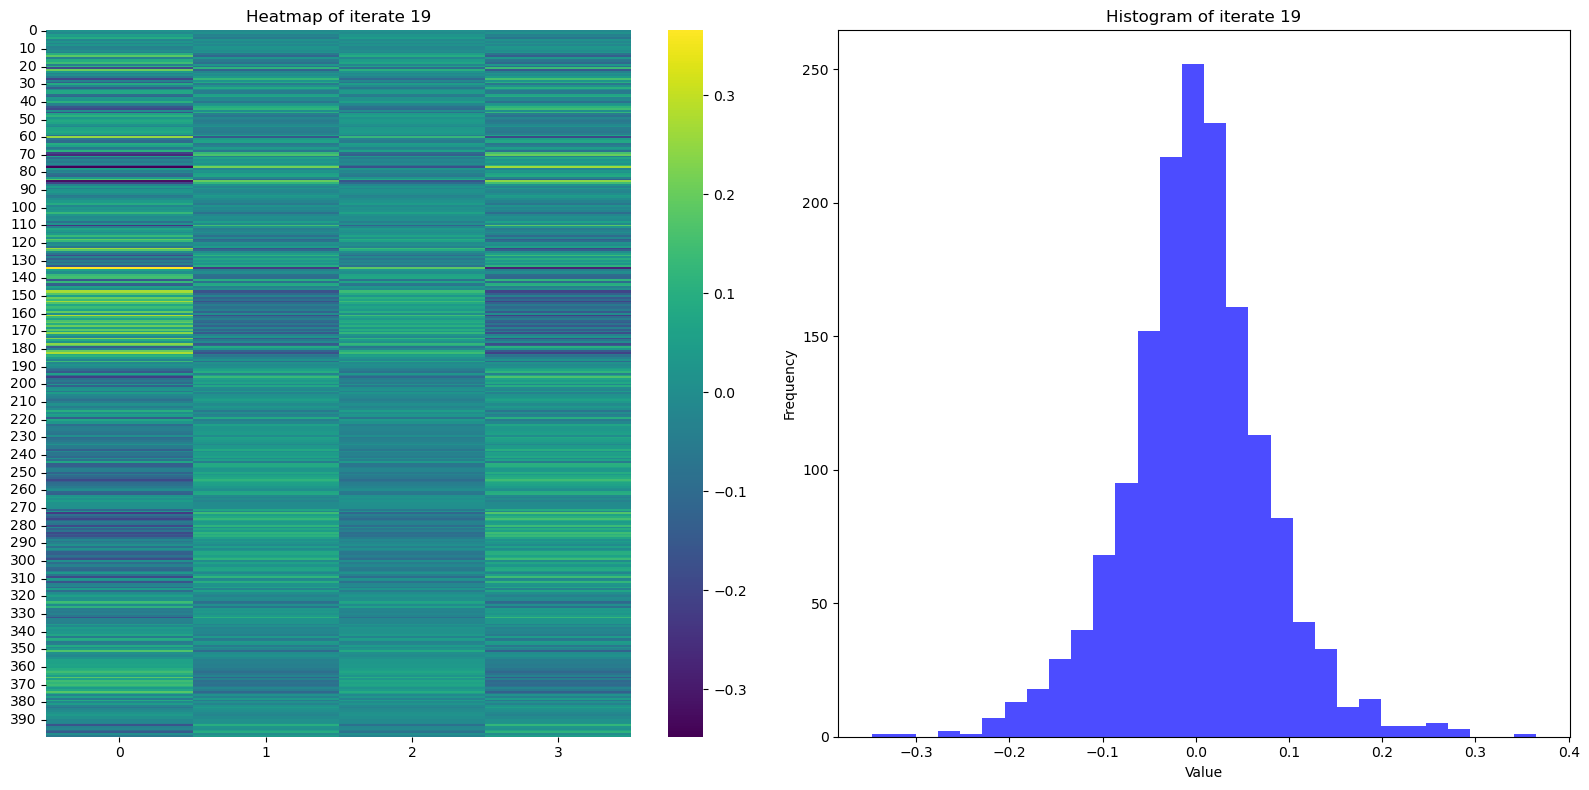

Energy of iterate 19: 3.064387715051245


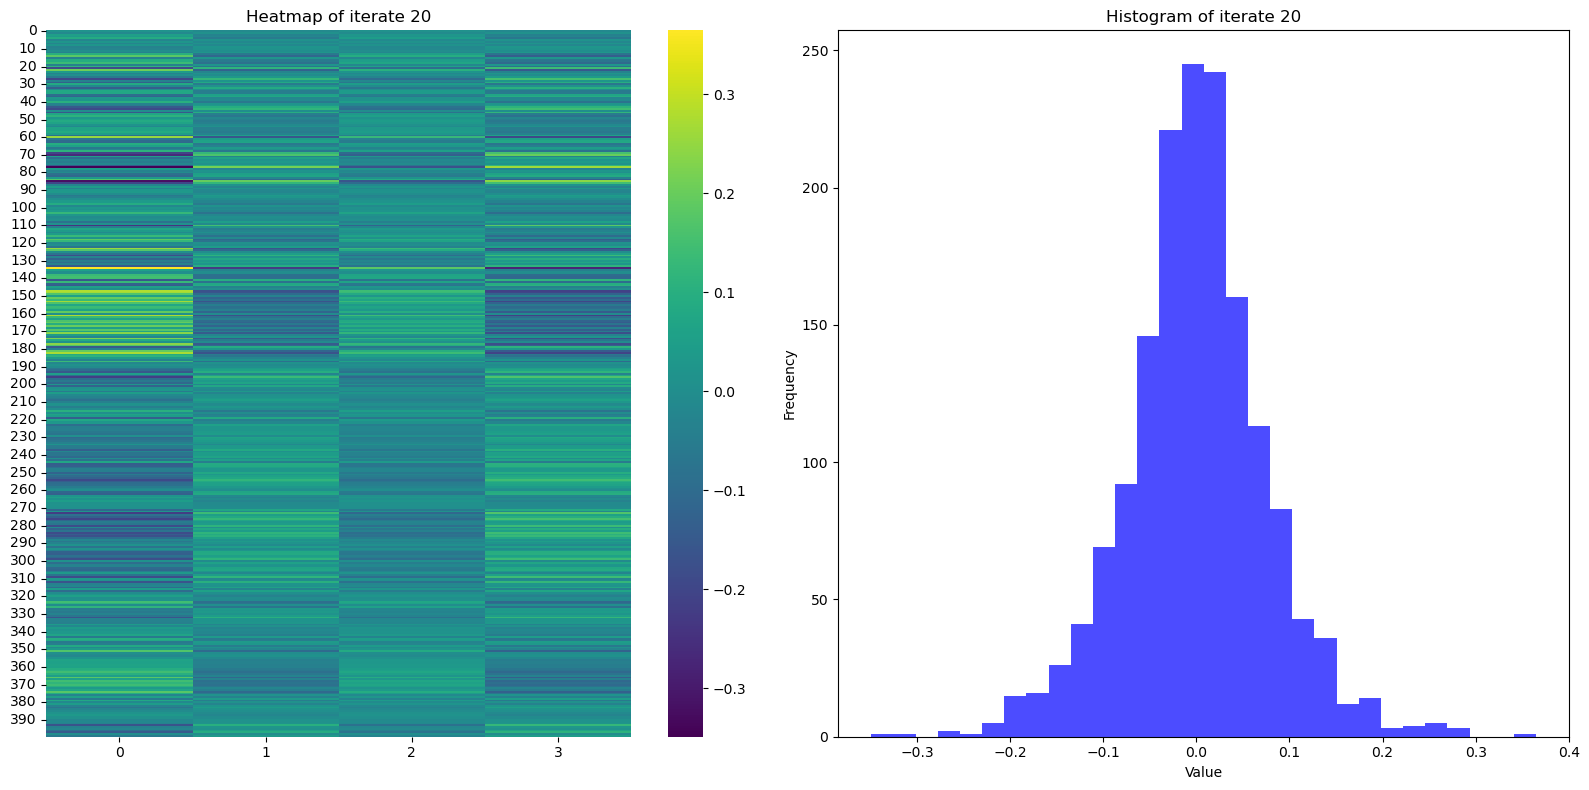

Energy of iterate 20: 3.061679552878557


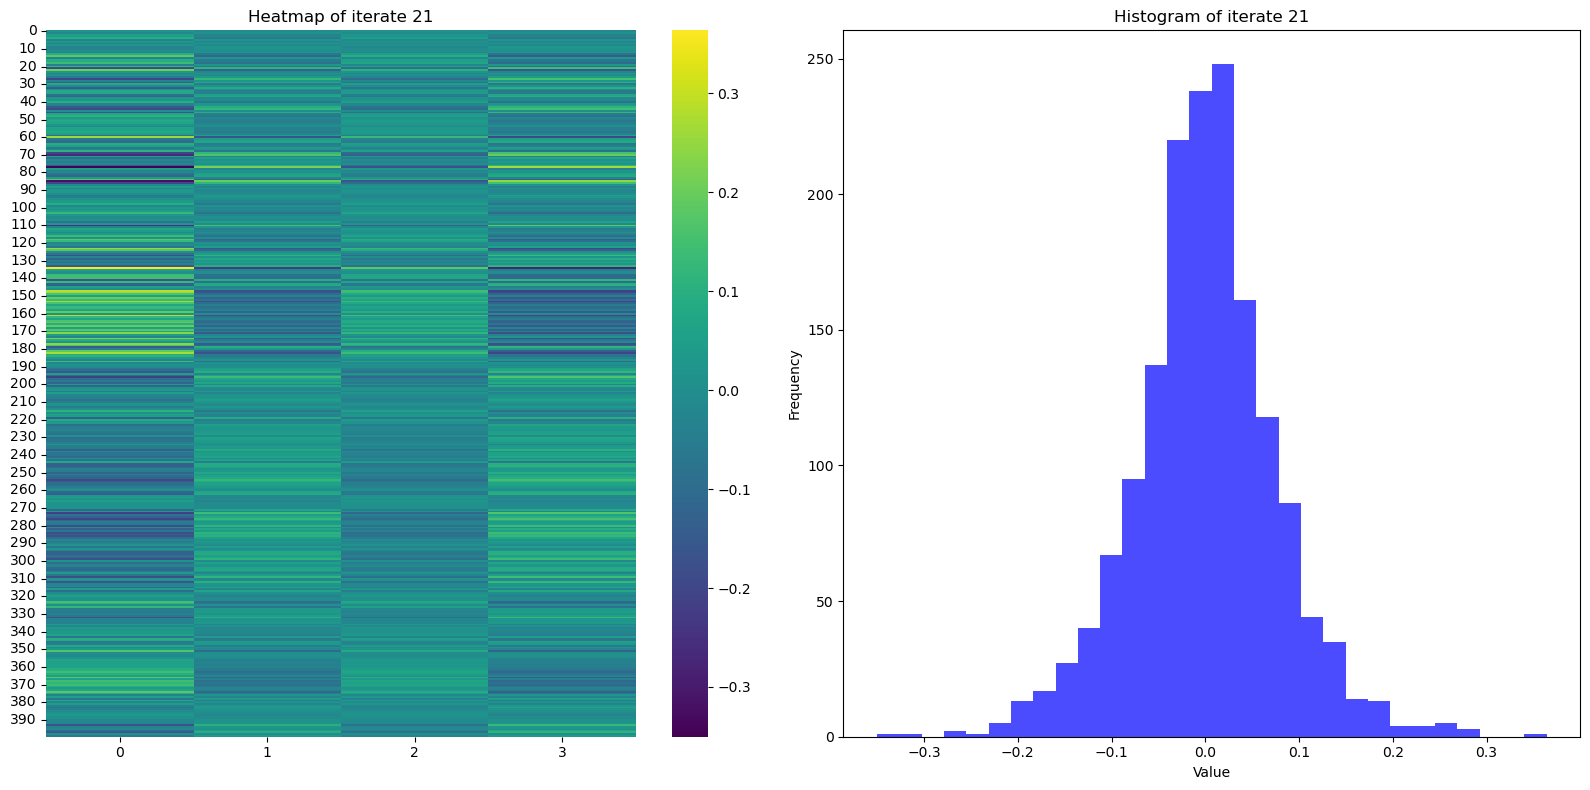

Energy of iterate 21: 3.059804581167182


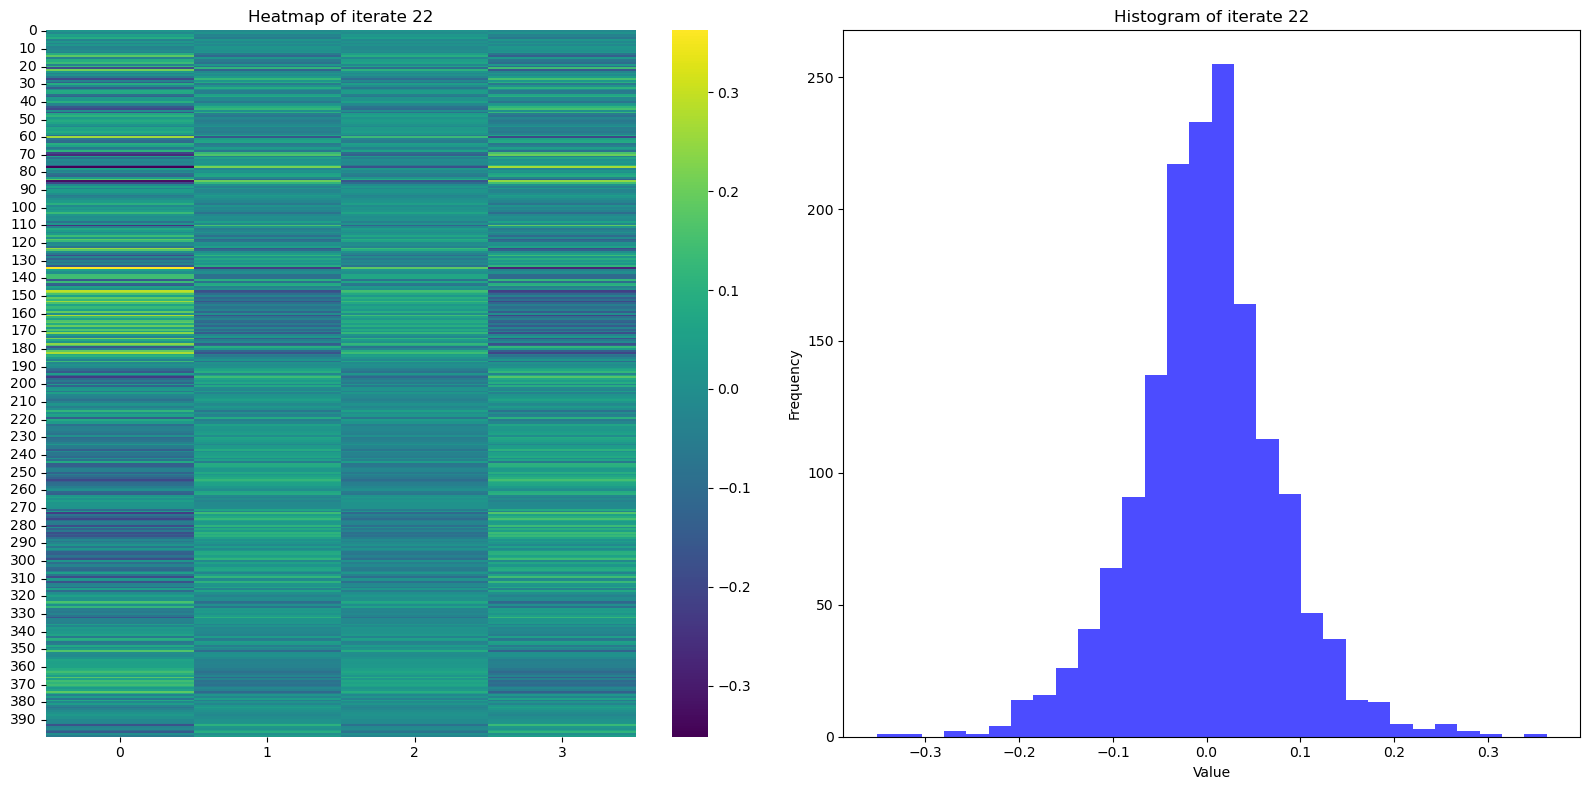

Energy of iterate 22: 3.0587054164948673


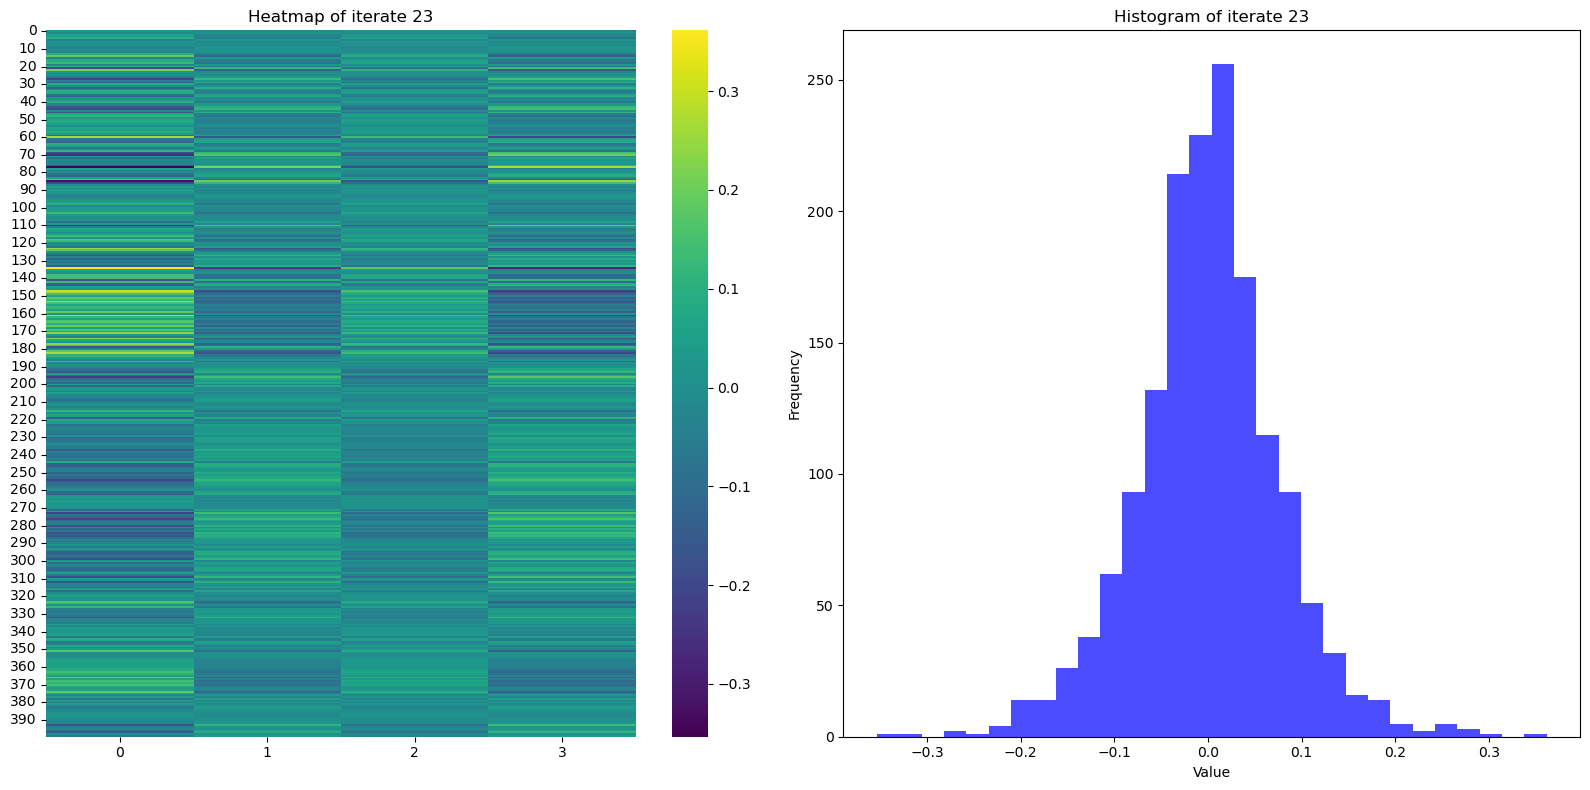

Energy of iterate 23: 3.058334727033249


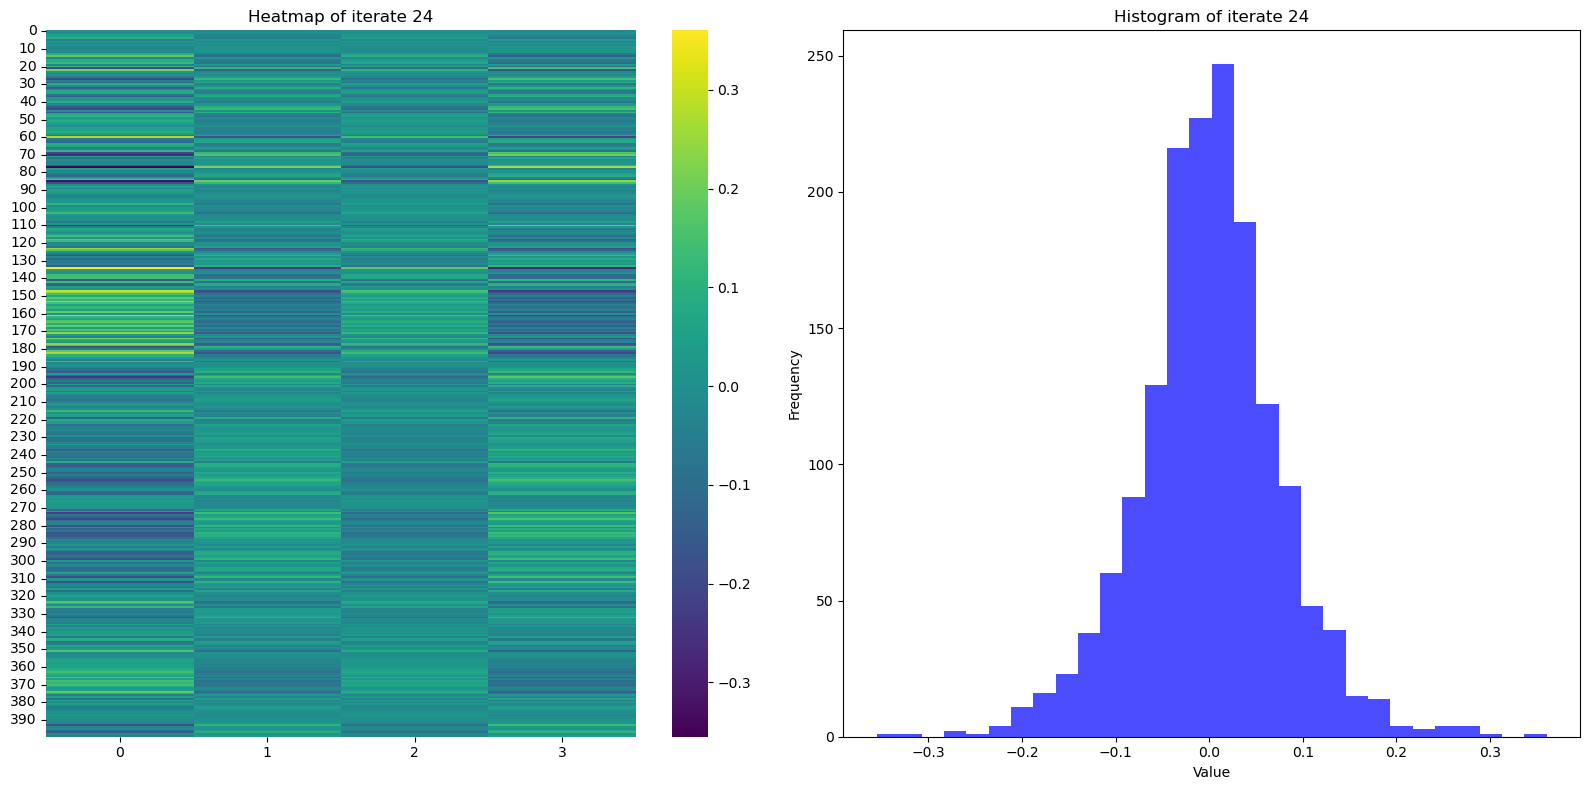

Energy of iterate 24: 3.0586493531803156


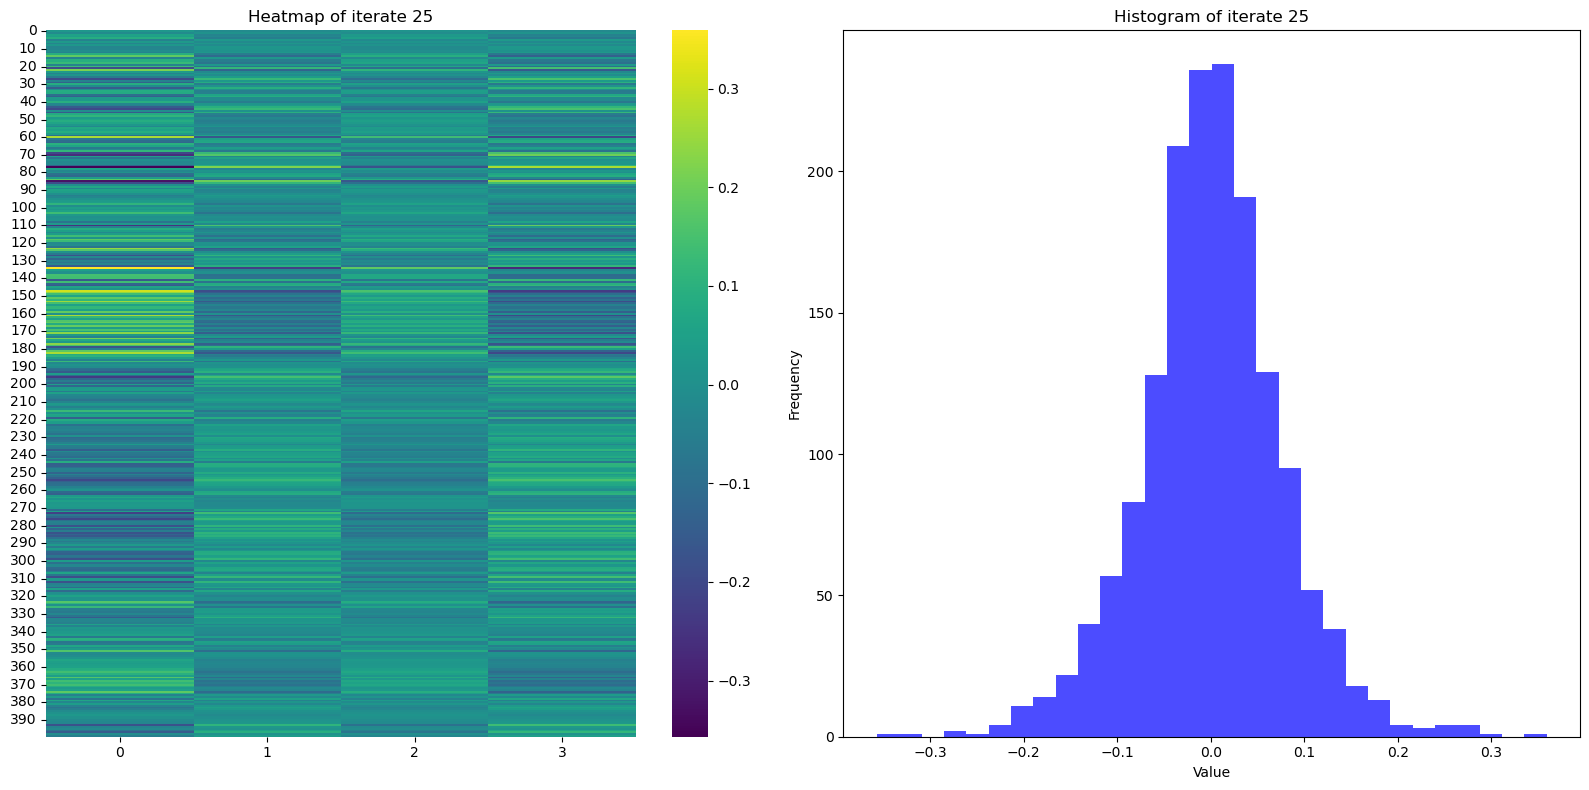

Energy of iterate 25: 3.0596061471822513


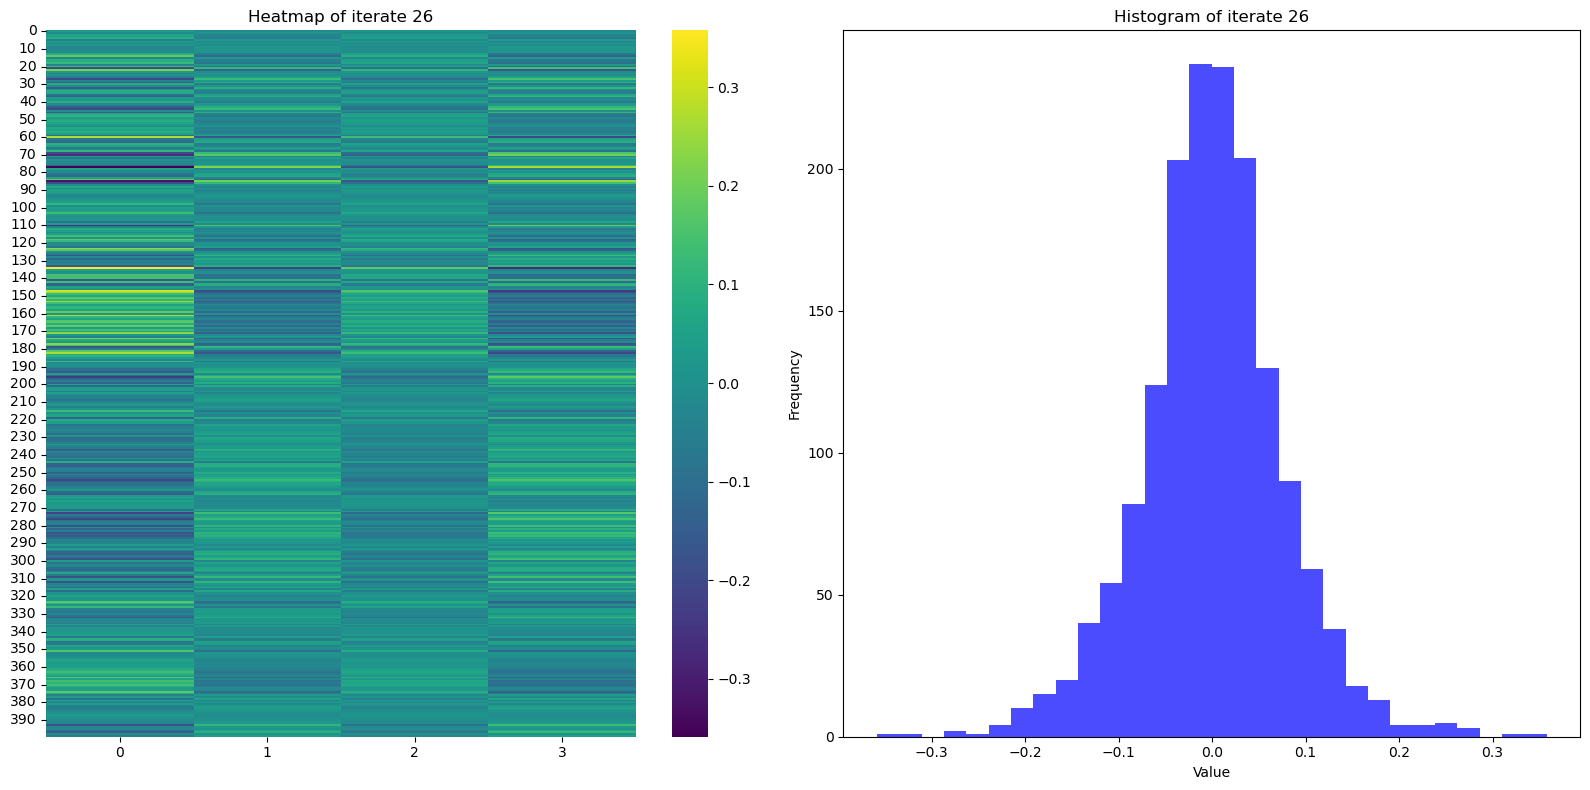

Energy of iterate 26: 3.0611592562431738


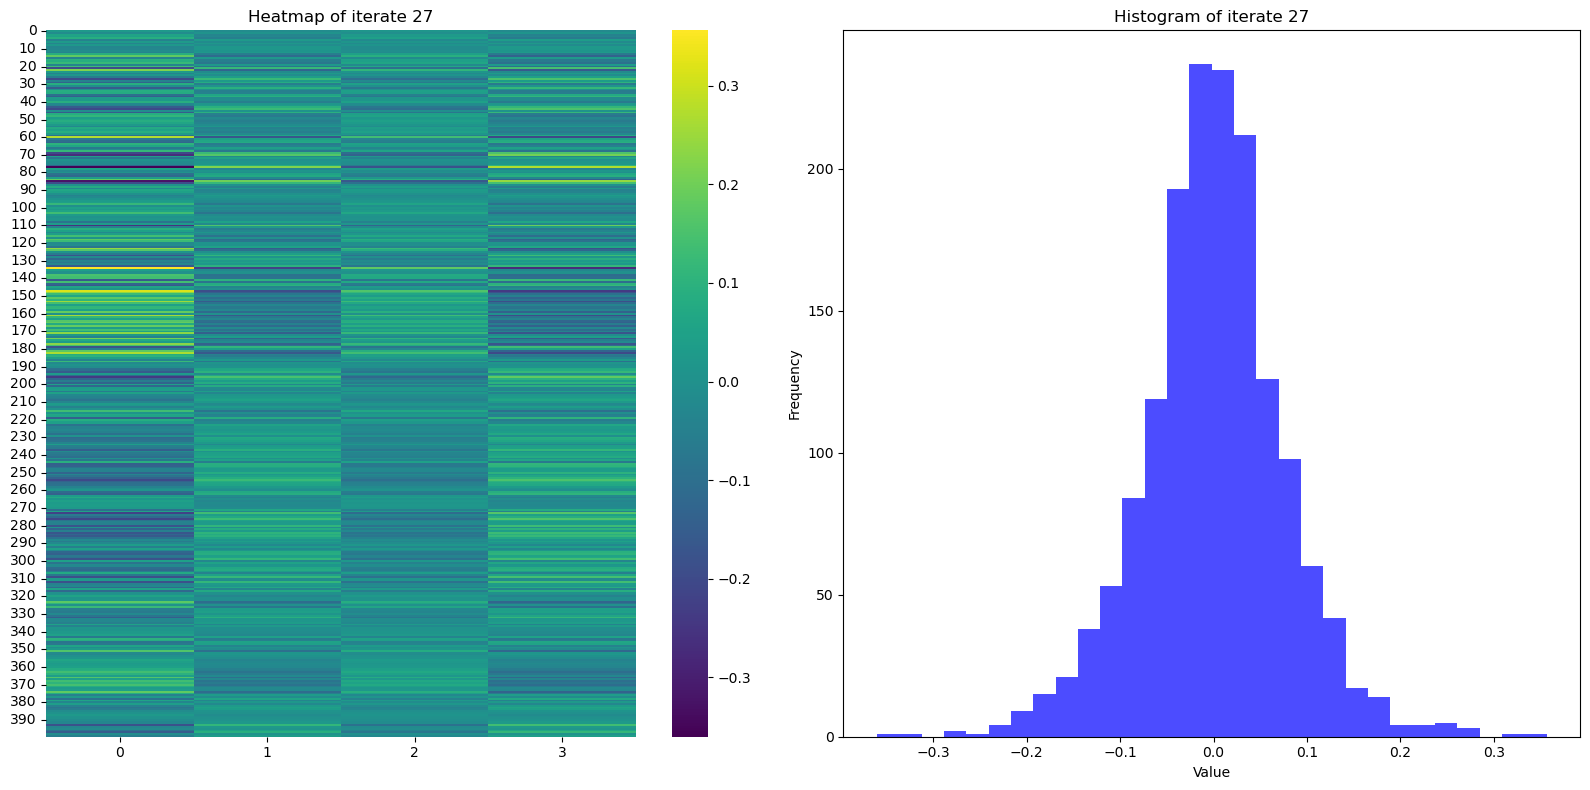

Energy of iterate 27: 3.0632585730895654


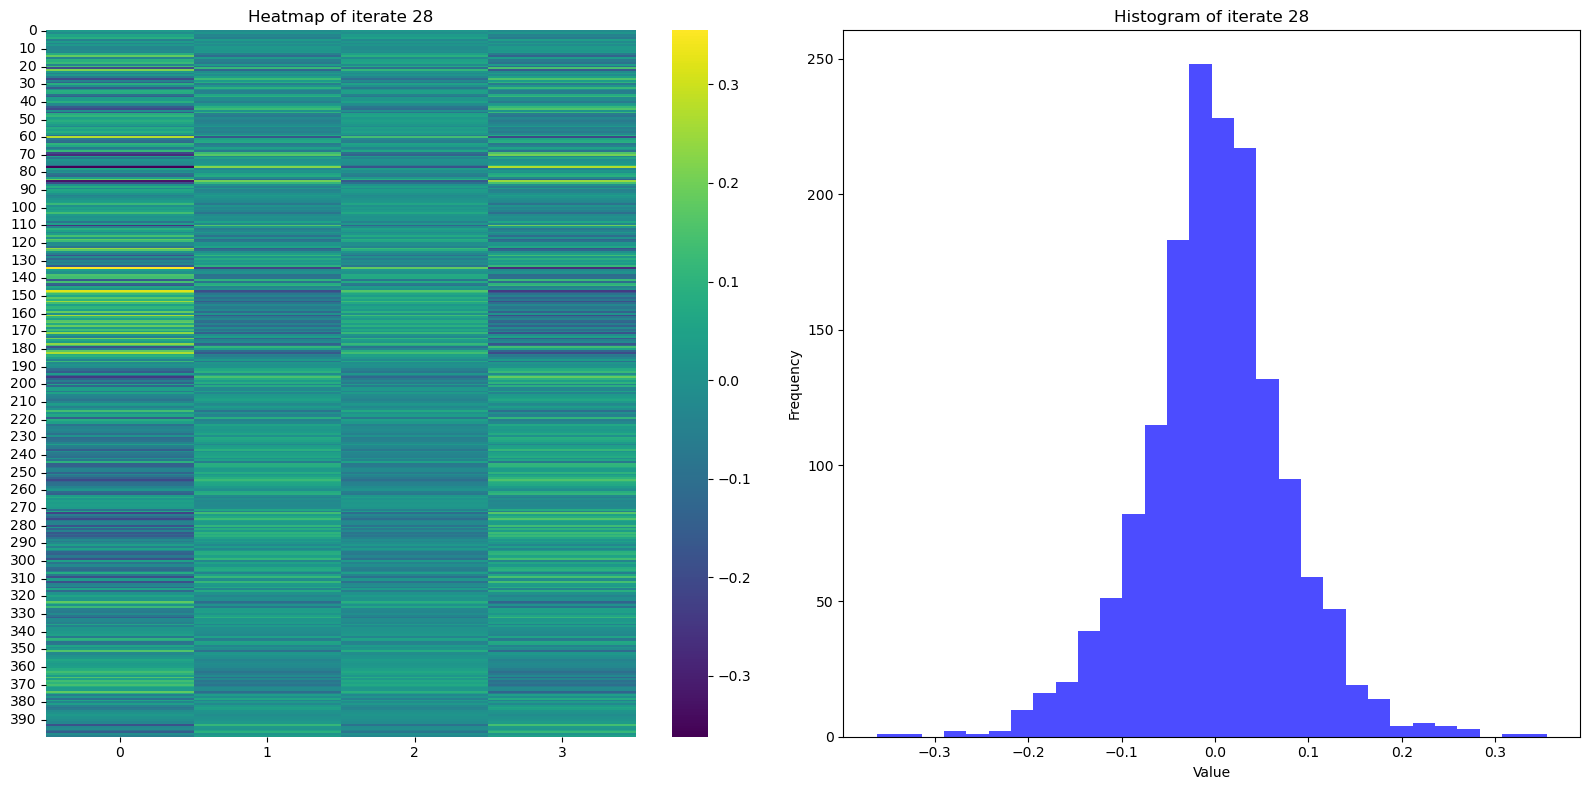

Energy of iterate 28: 3.065849128695497


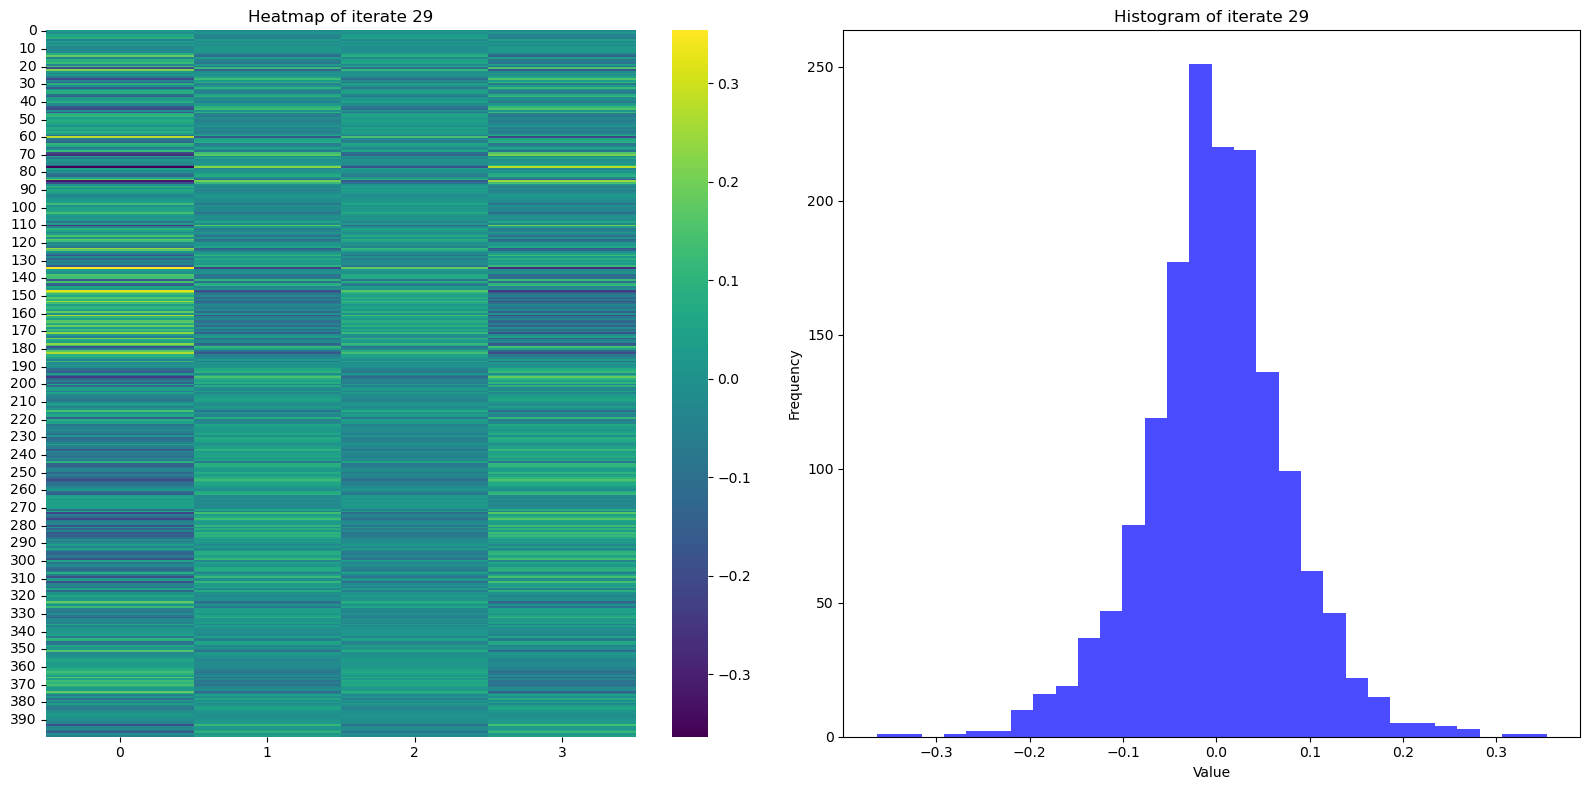

Energy of iterate 29: 3.0688712515189316


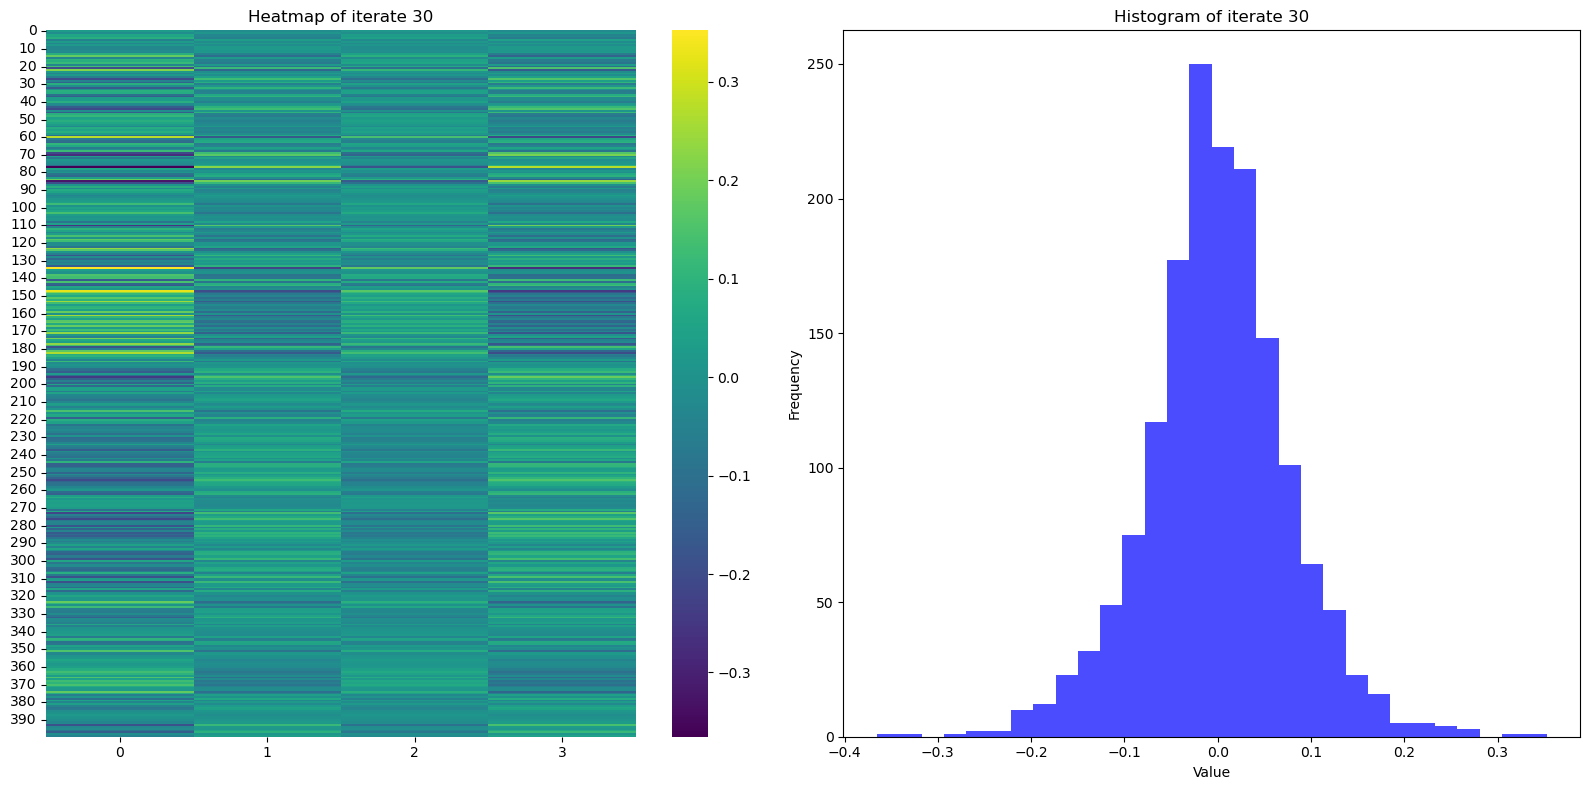

Energy of iterate 30: 3.0722613450352005


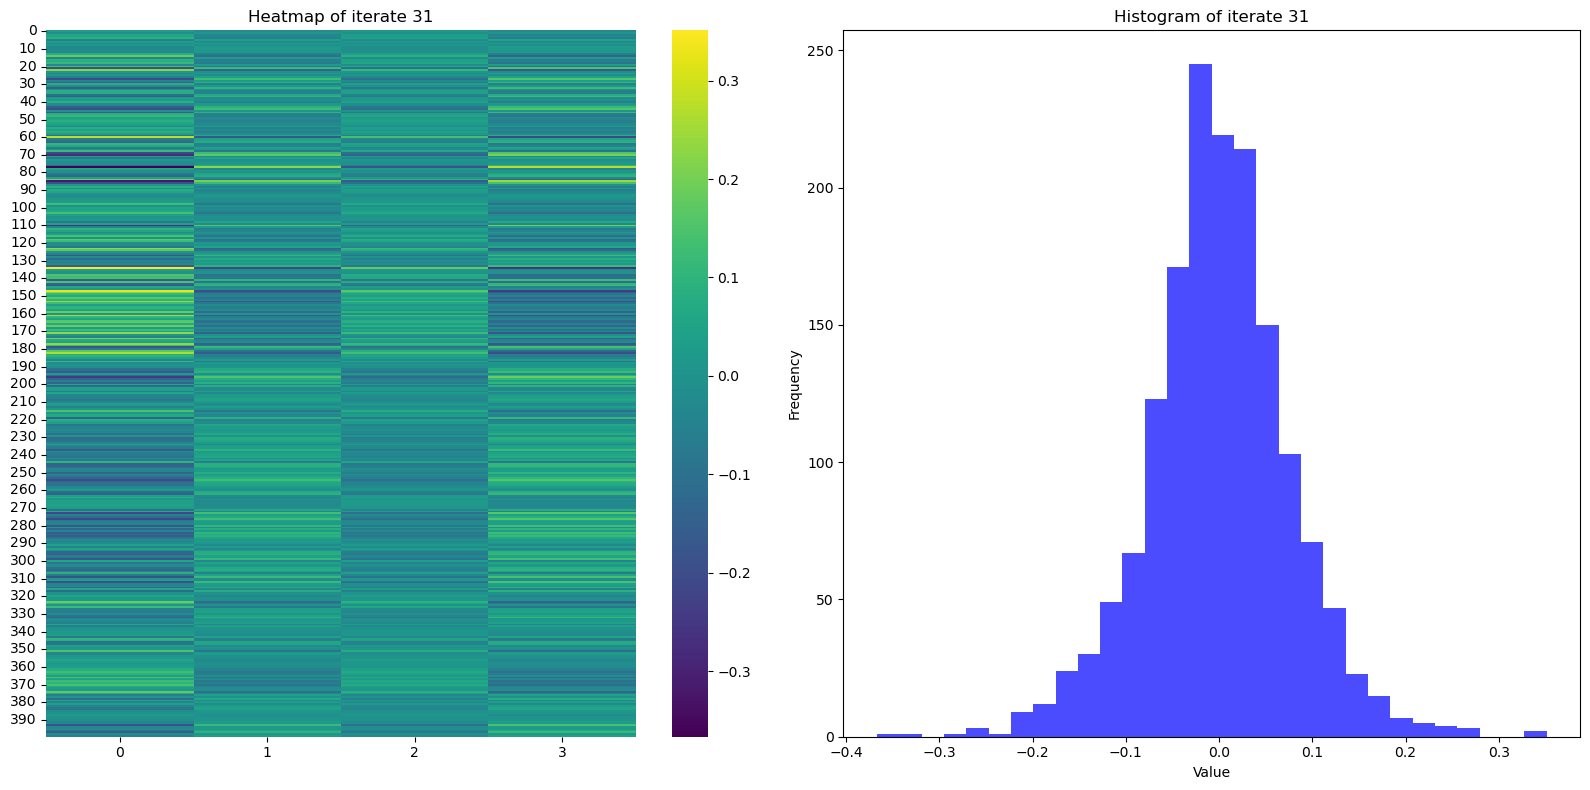

Energy of iterate 31: 3.0759531404891605


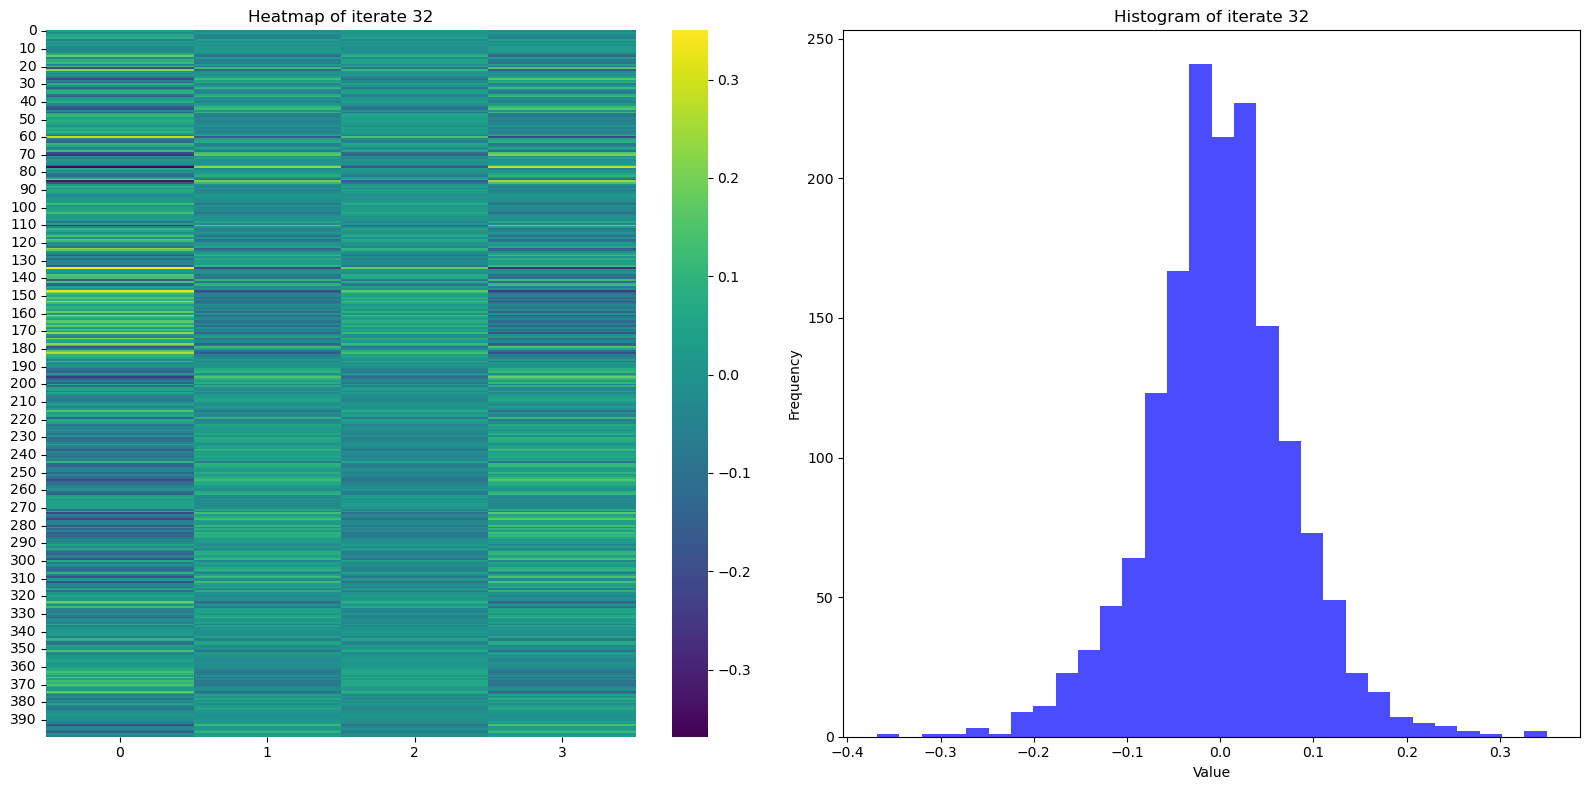

Energy of iterate 32: 3.0798792740530554


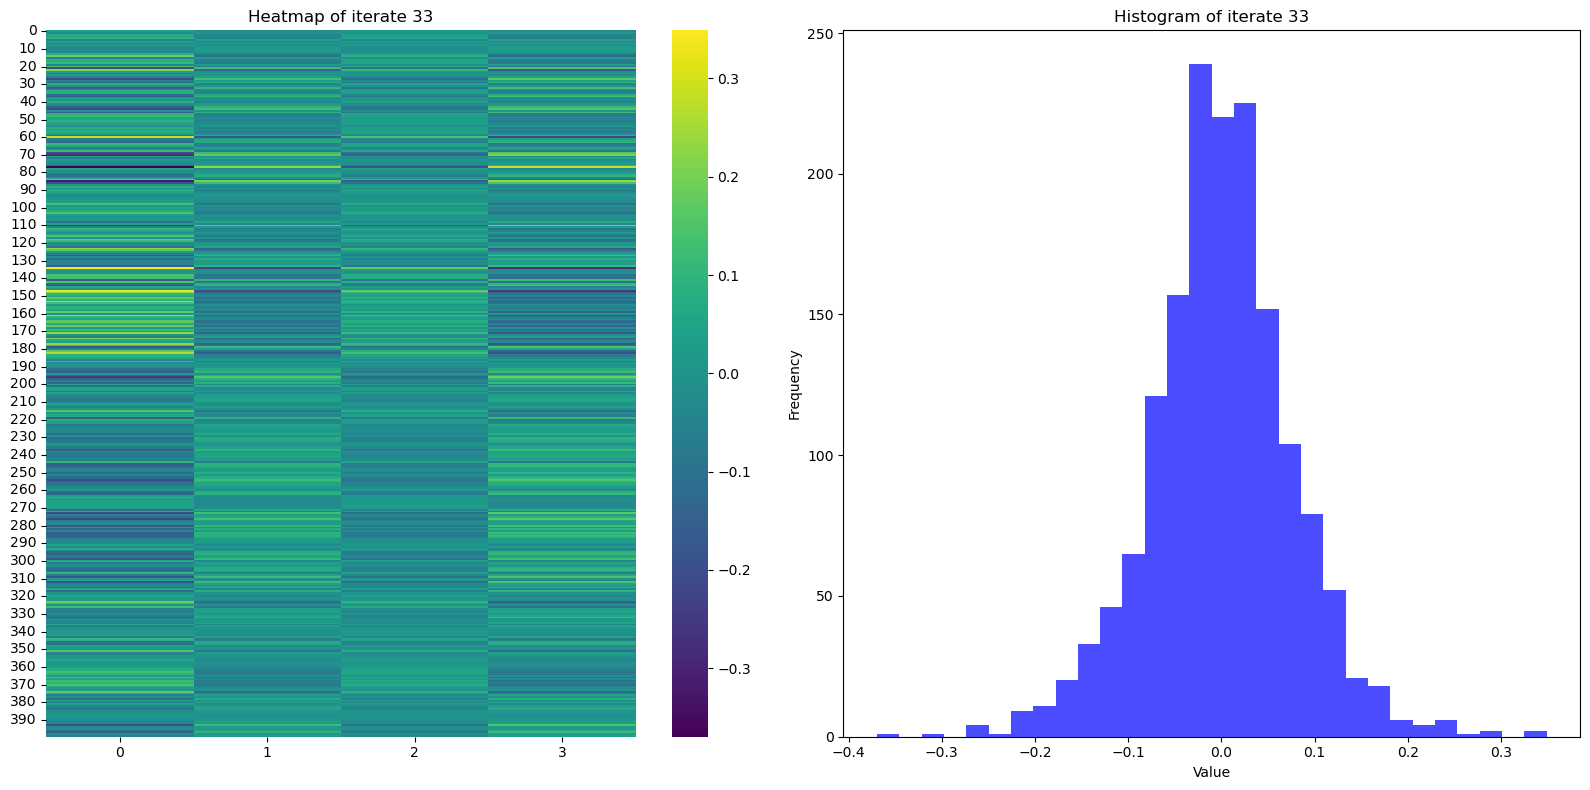

Energy of iterate 33: 3.0839730287096994


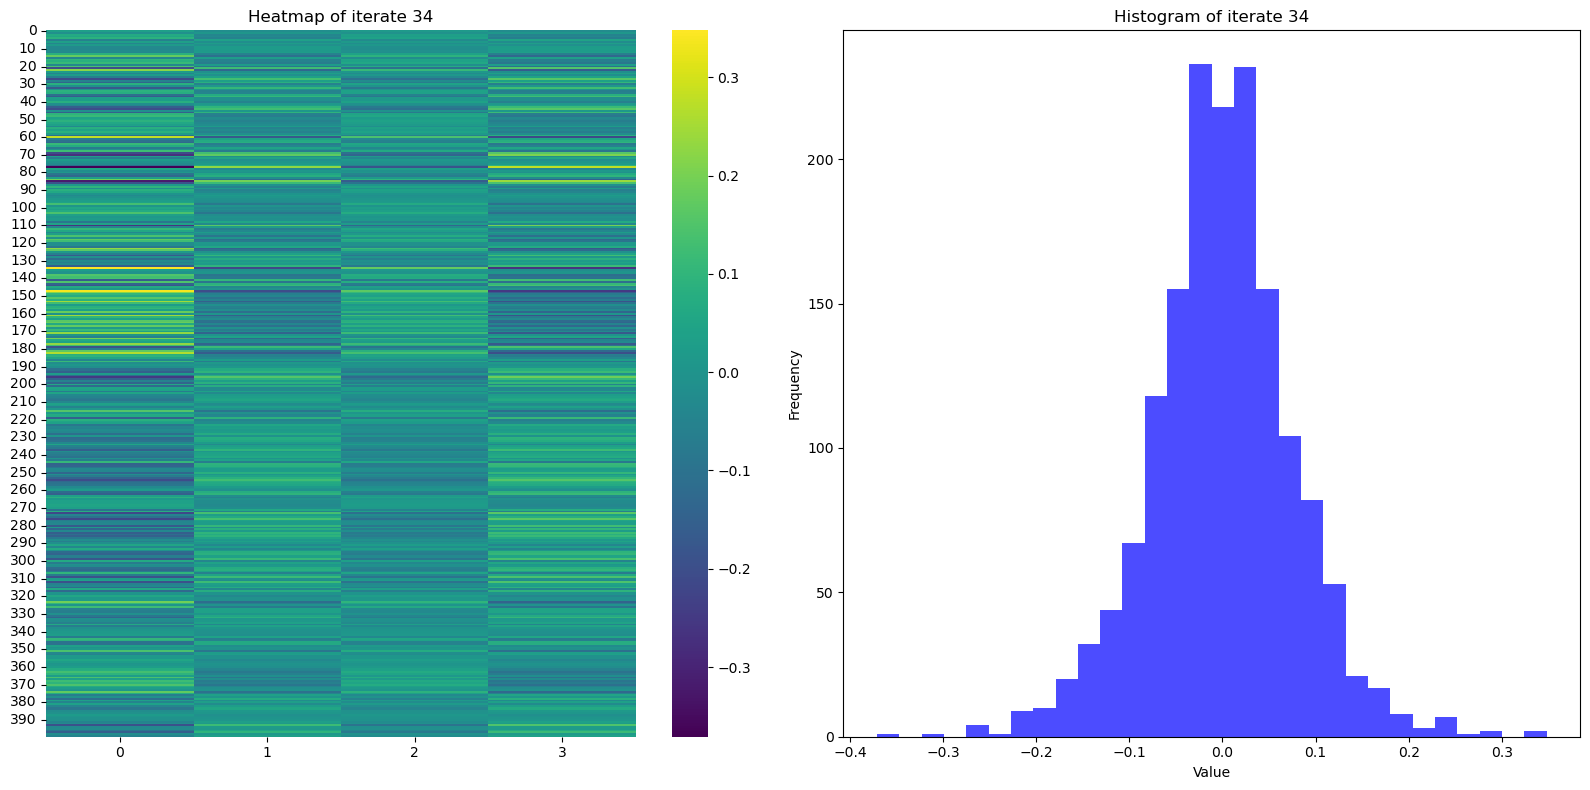

Energy of iterate 34: 3.0881700809667603


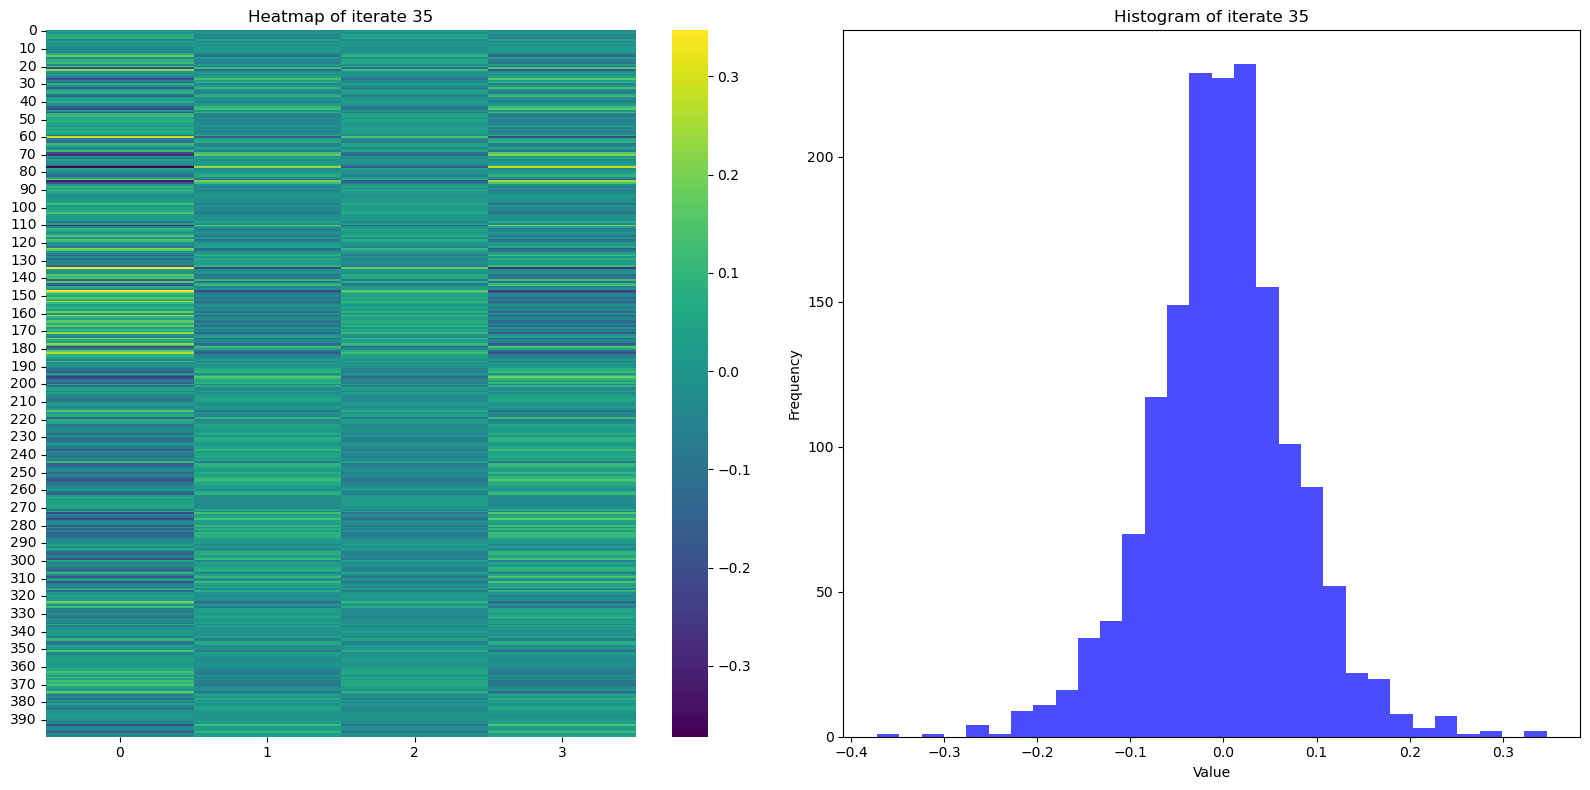

Energy of iterate 35: 3.0924101063772955


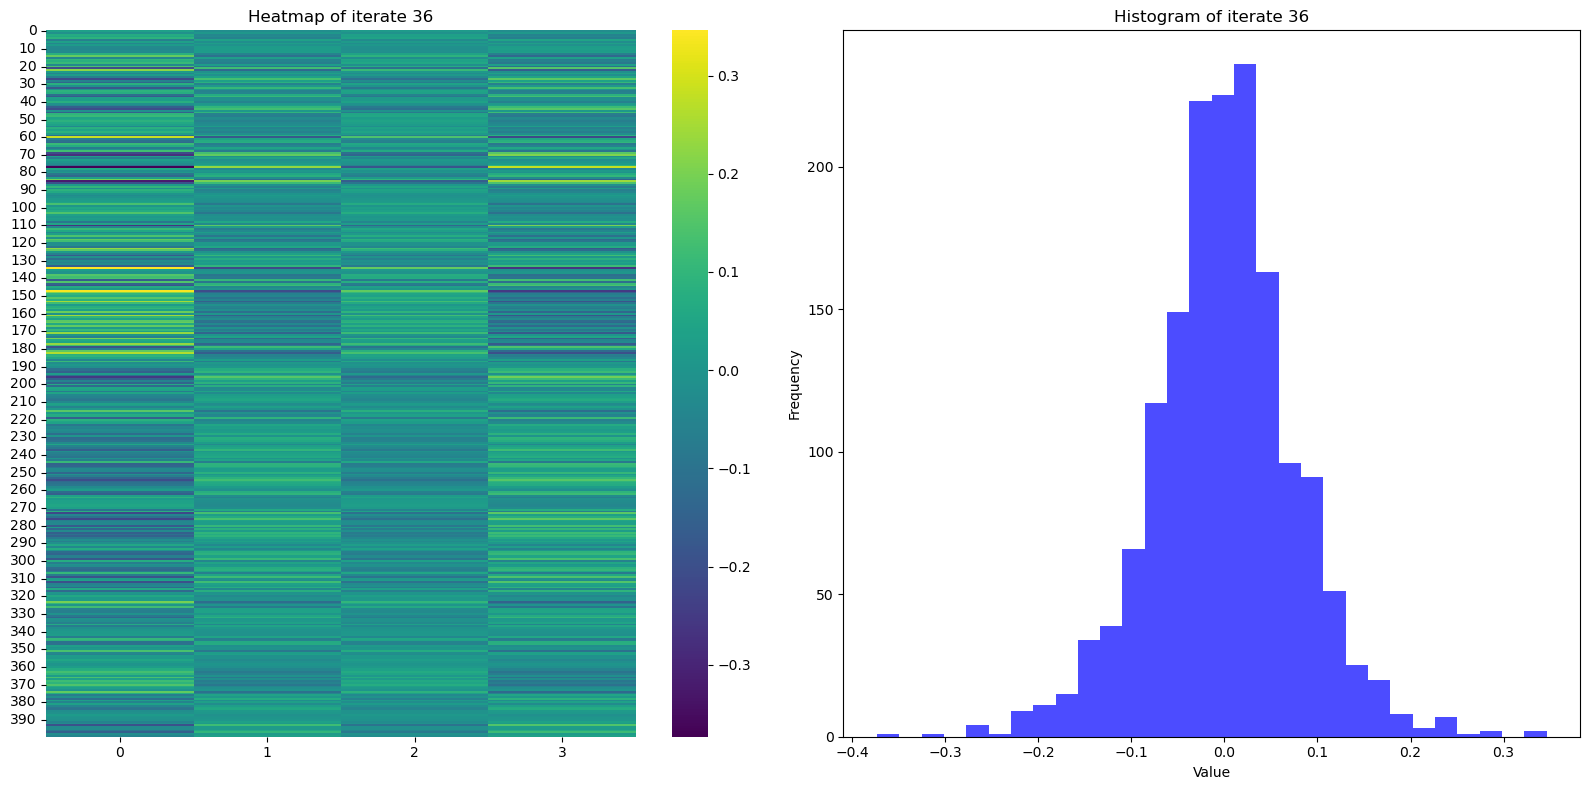

Energy of iterate 36: 3.096638126118436


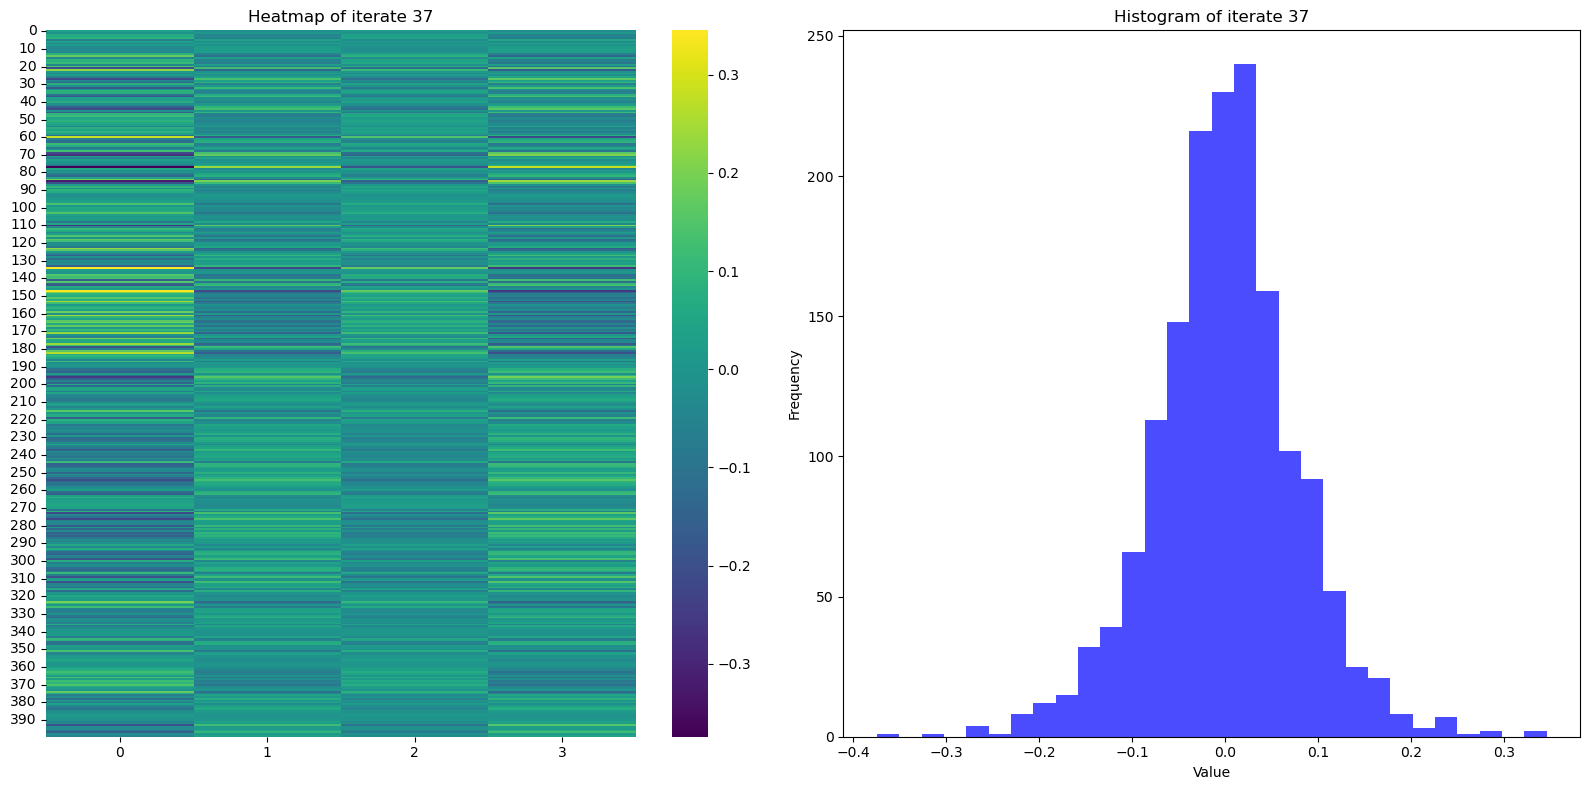

Energy of iterate 37: 3.1008055155920586


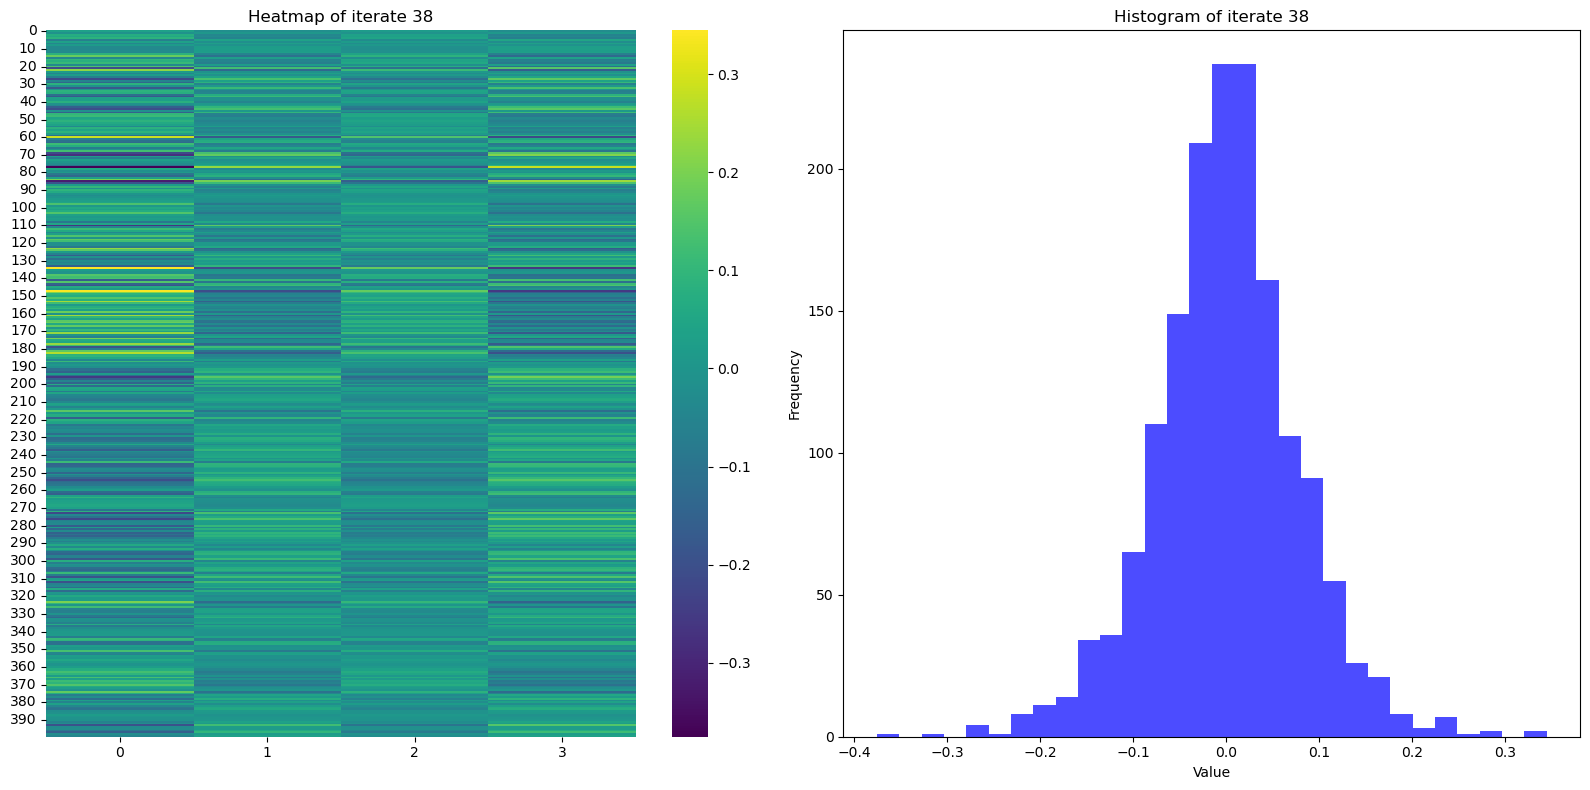

Energy of iterate 38: 3.104870638764246


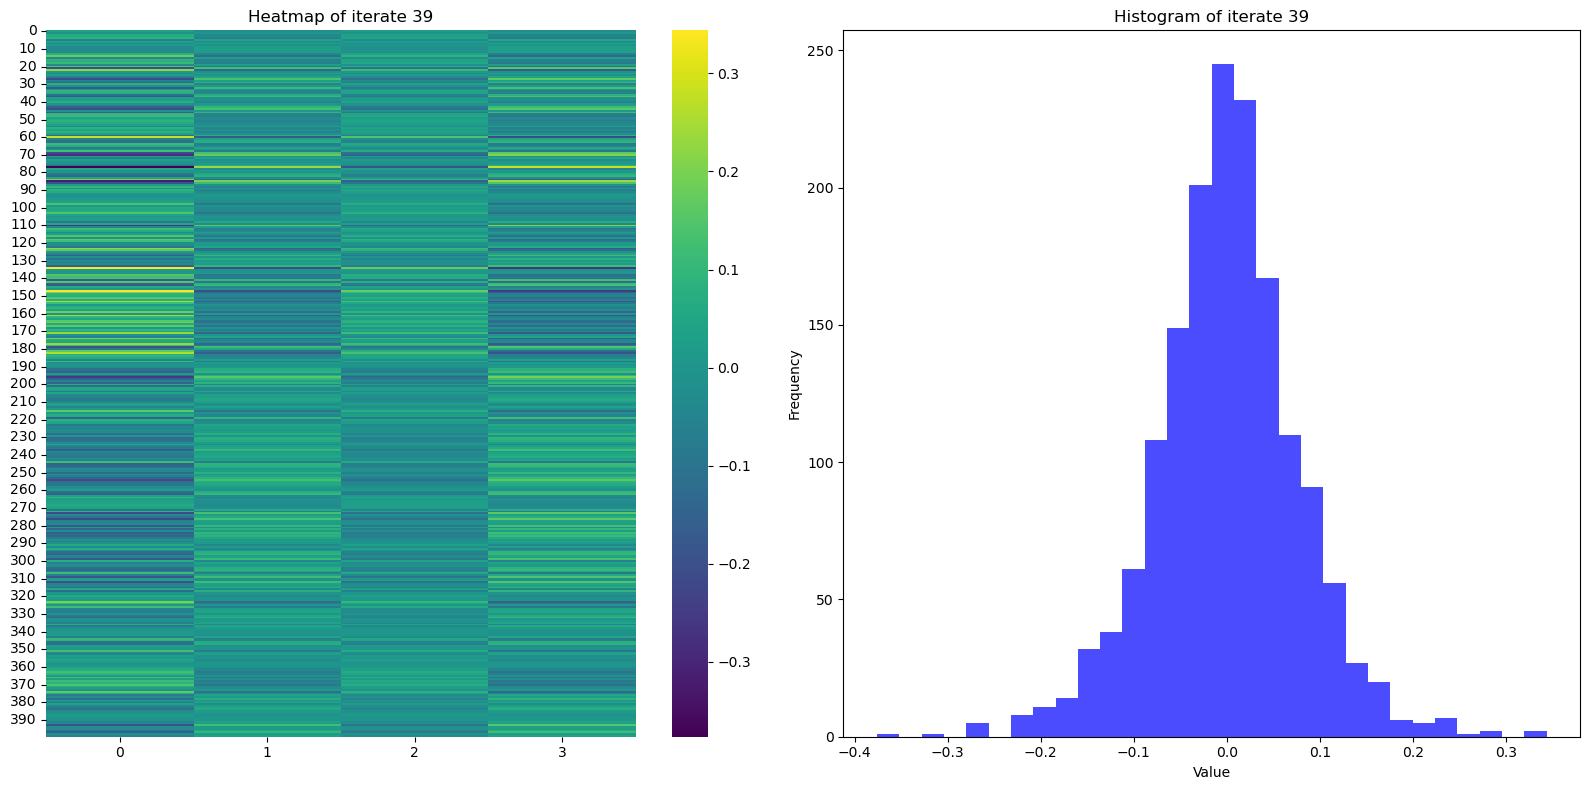

Energy of iterate 39: 3.1087991121060266


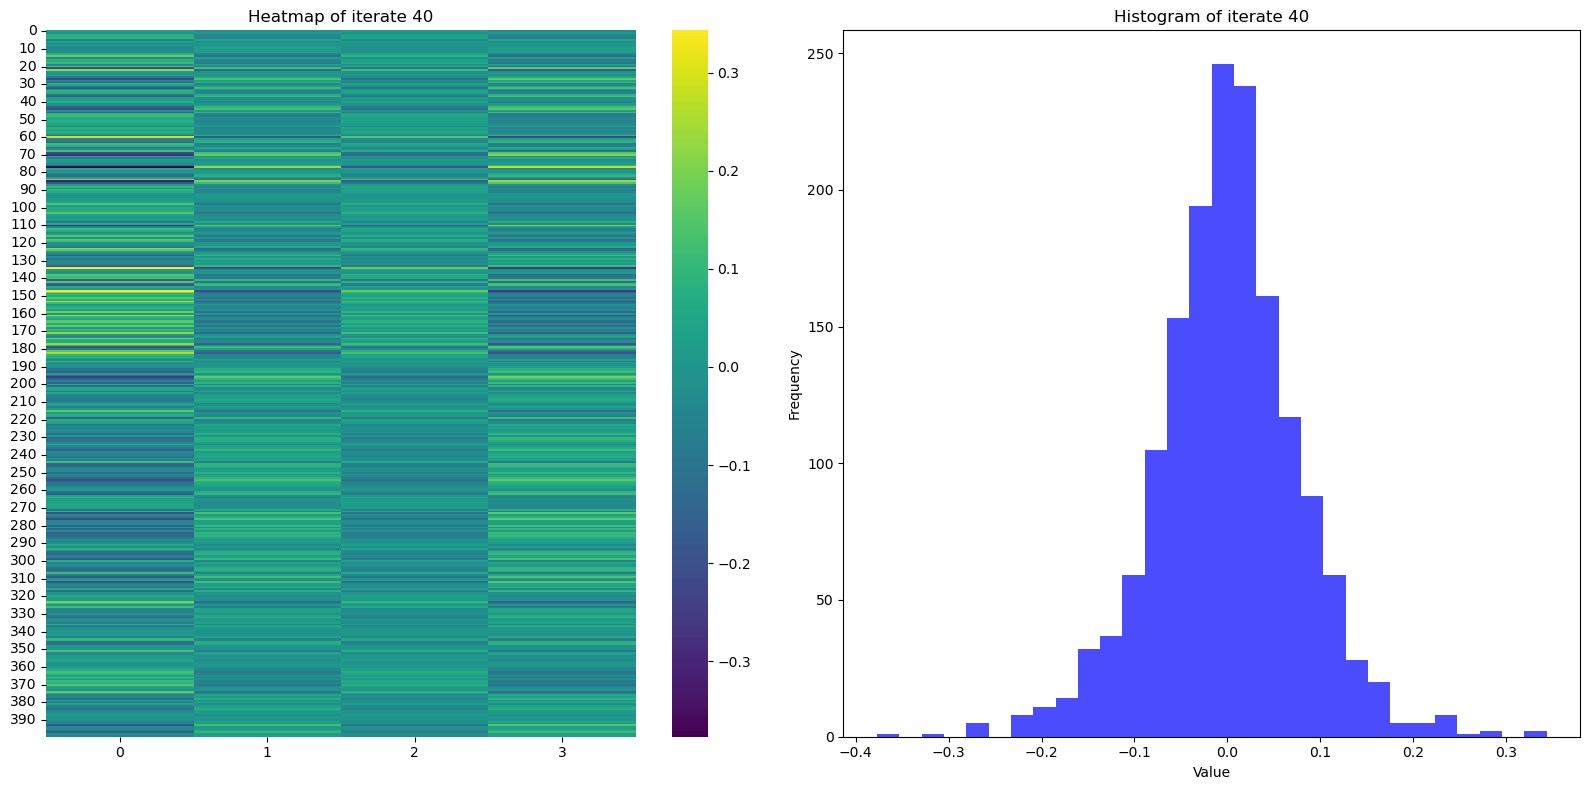

Energy of iterate 40: 3.1125637343627637


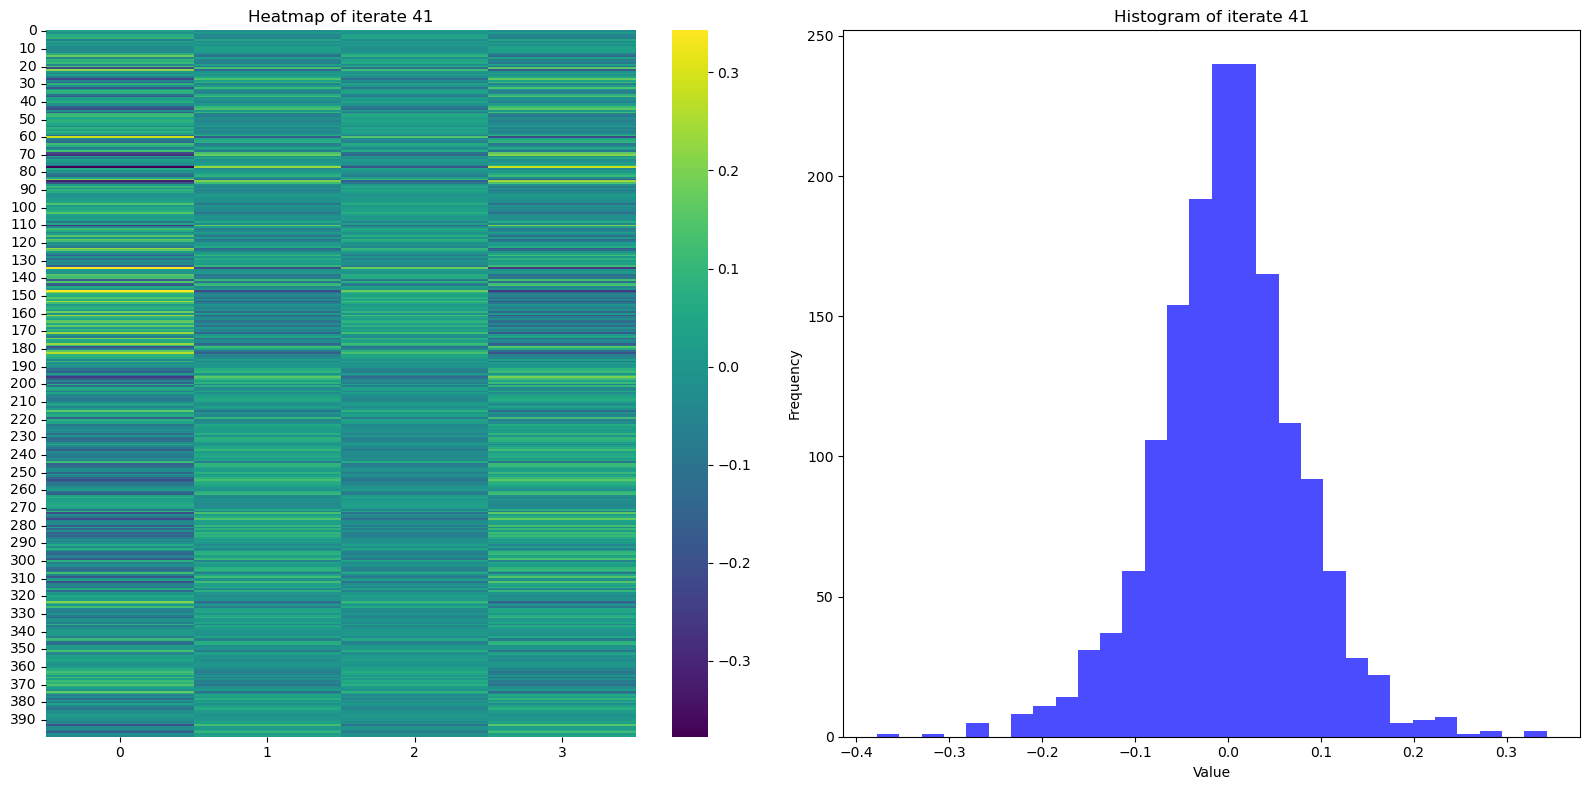

Energy of iterate 41: 3.1161441401578664


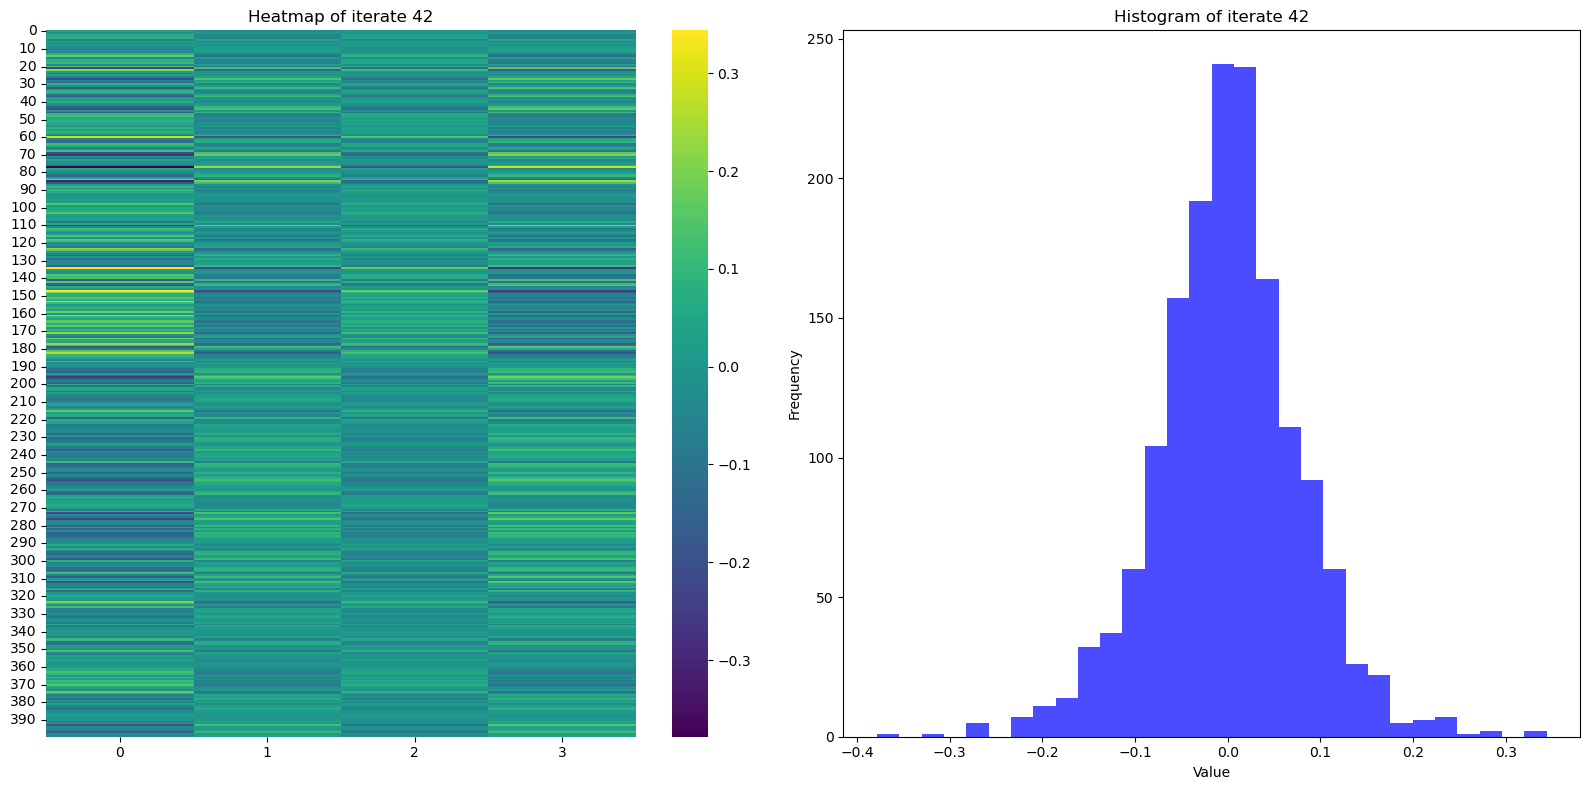

Energy of iterate 42: 3.1195262462237228


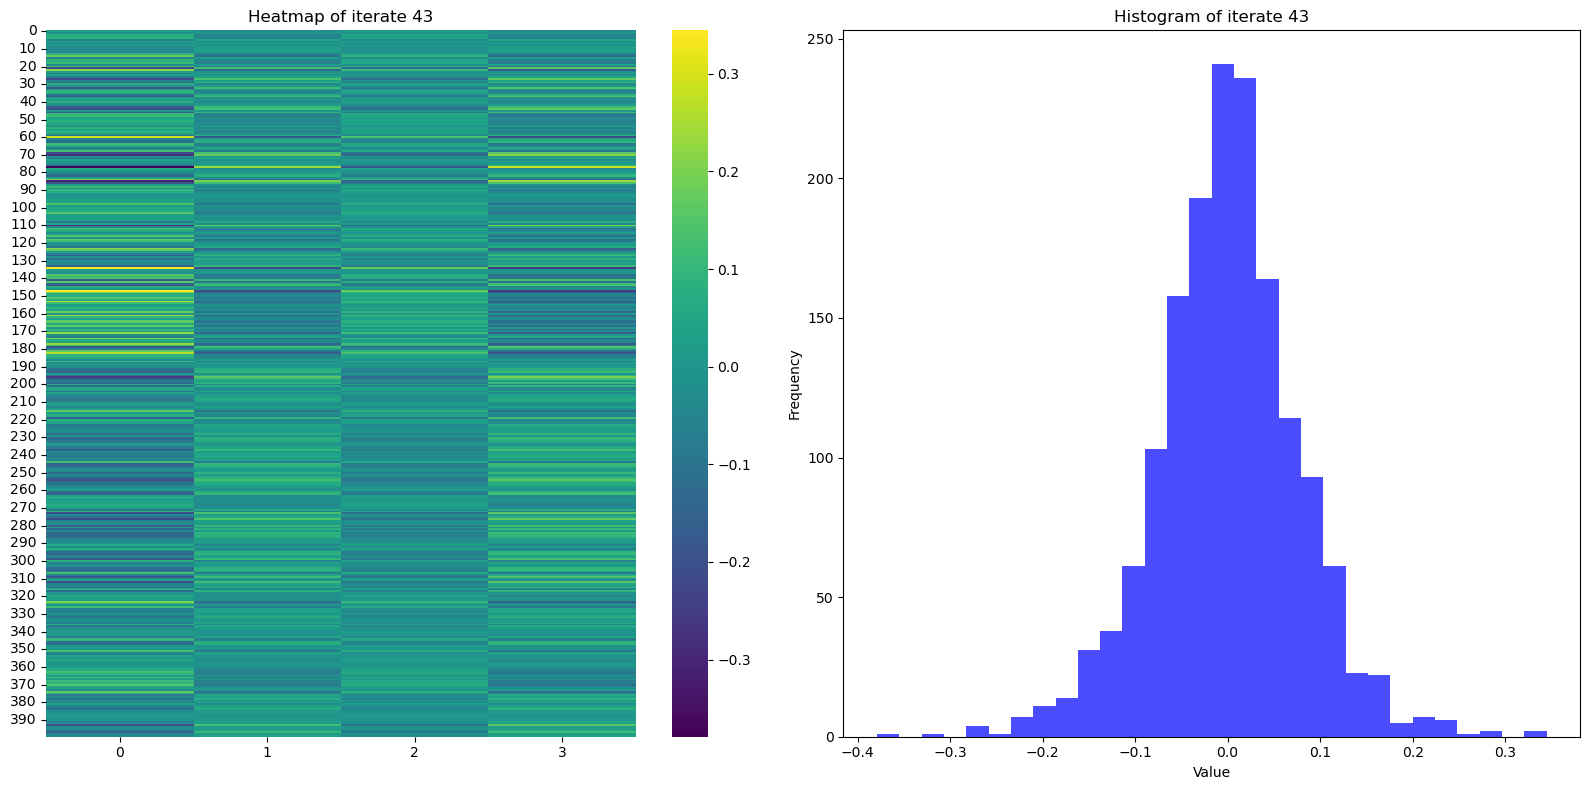

Energy of iterate 43: 3.1227015602840305


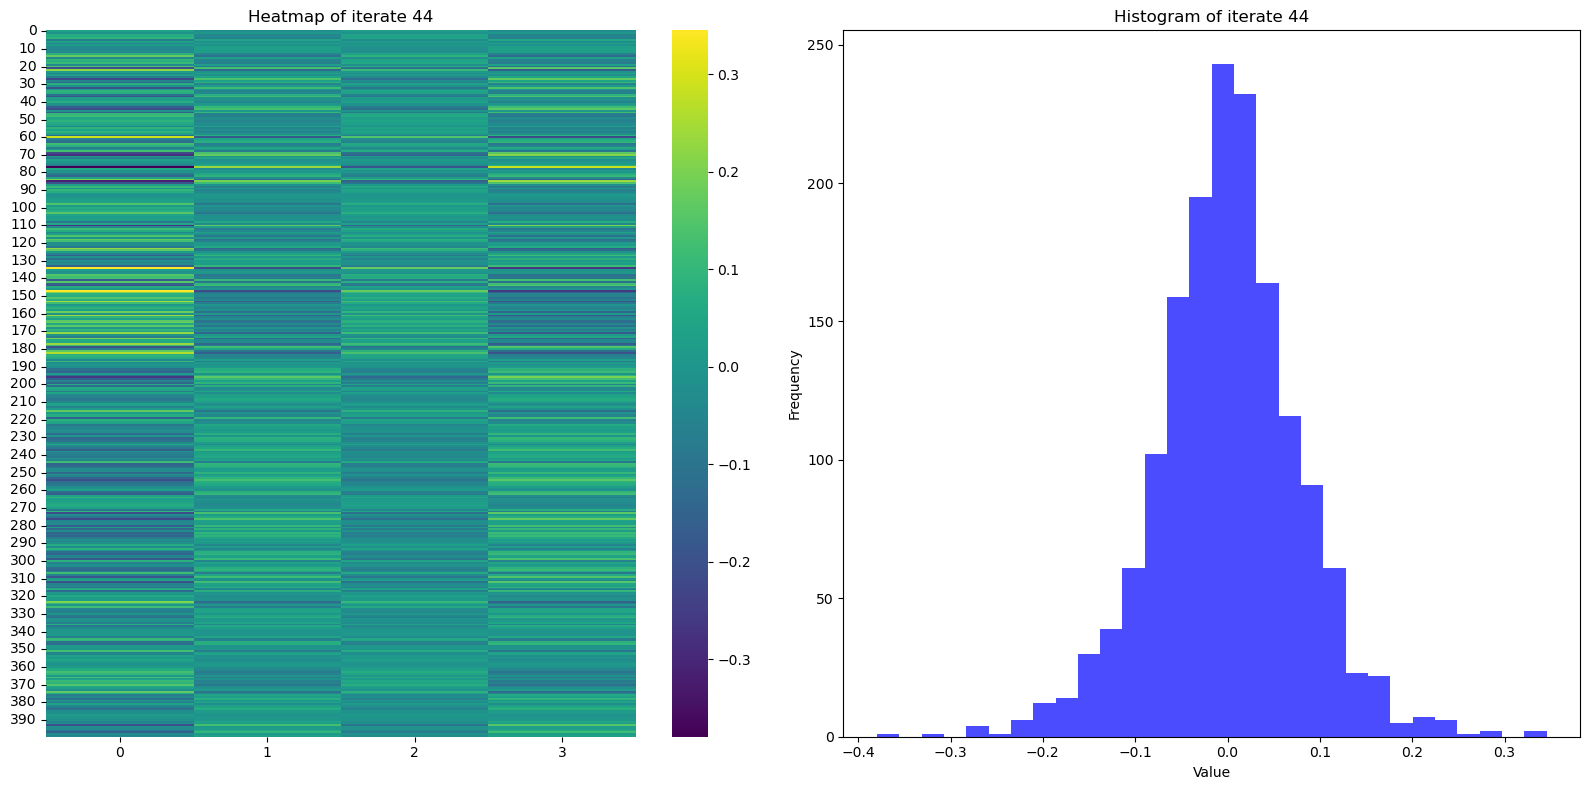

Energy of iterate 44: 3.125666416751912


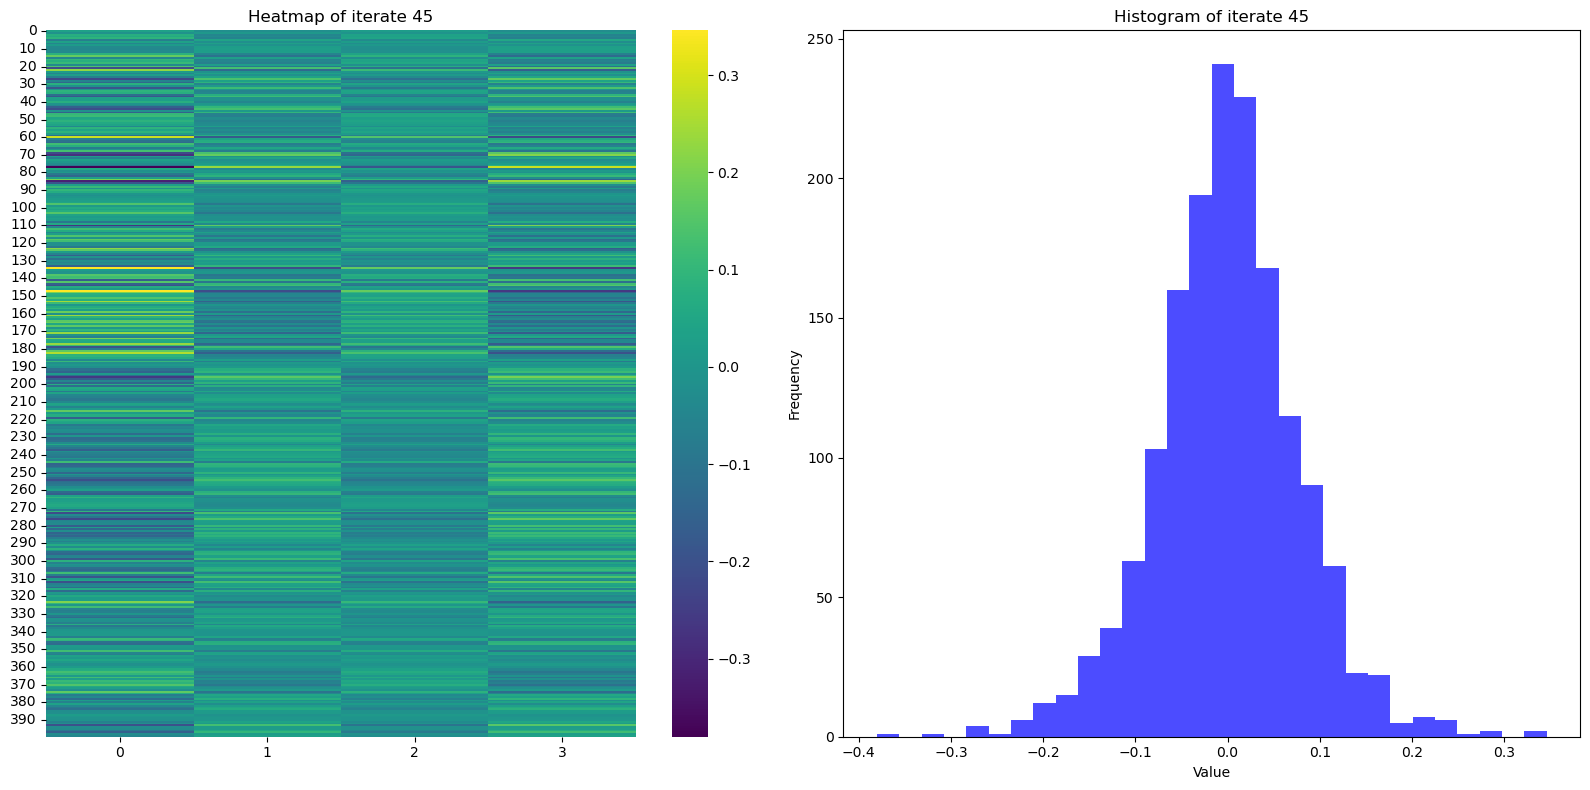

Energy of iterate 45: 3.128421193189851


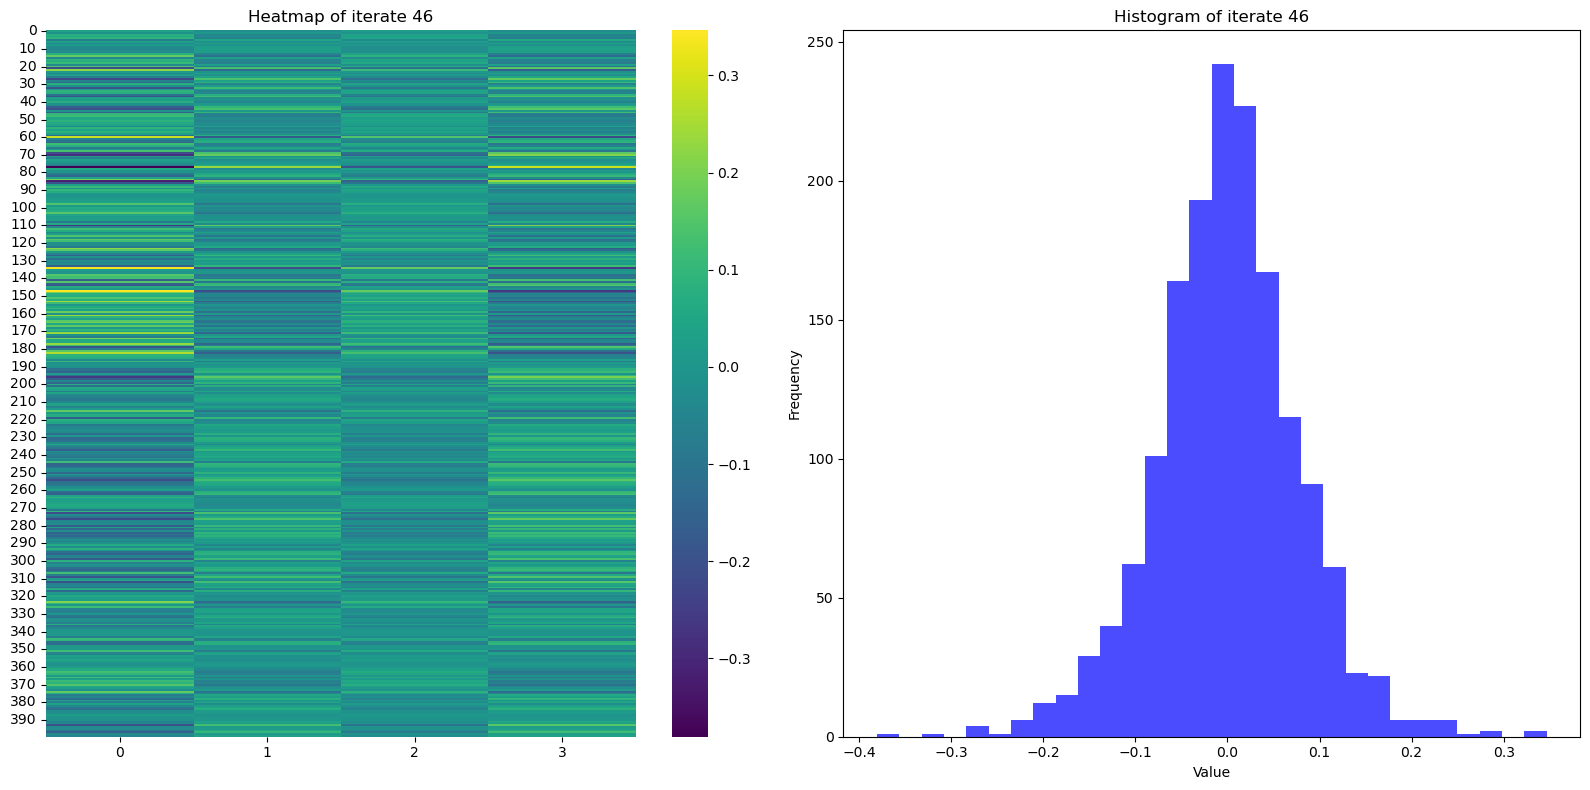

Energy of iterate 46: 3.1309695493528142


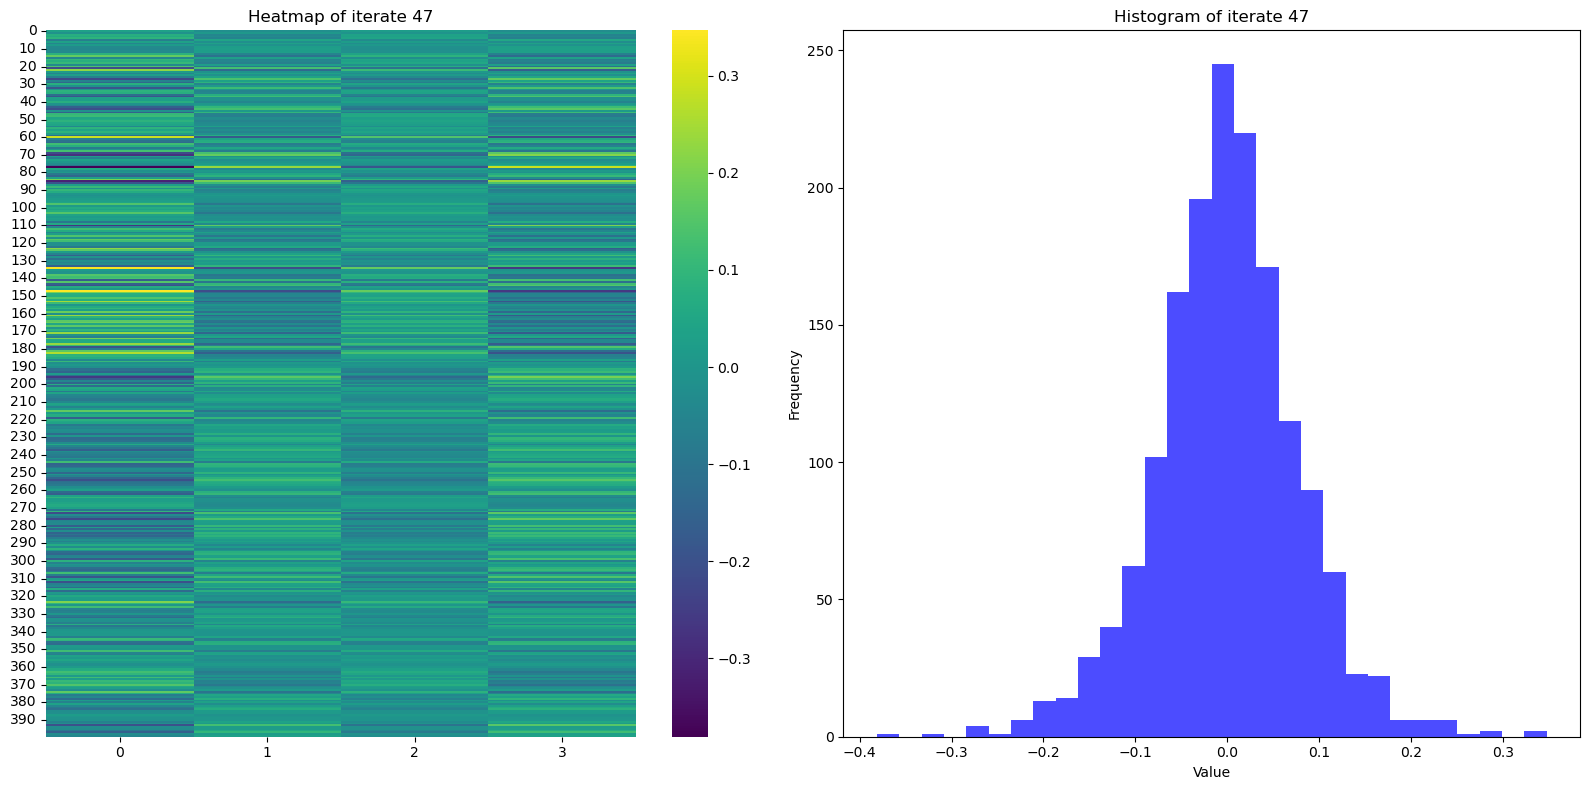

Energy of iterate 47: 3.1333177184850007


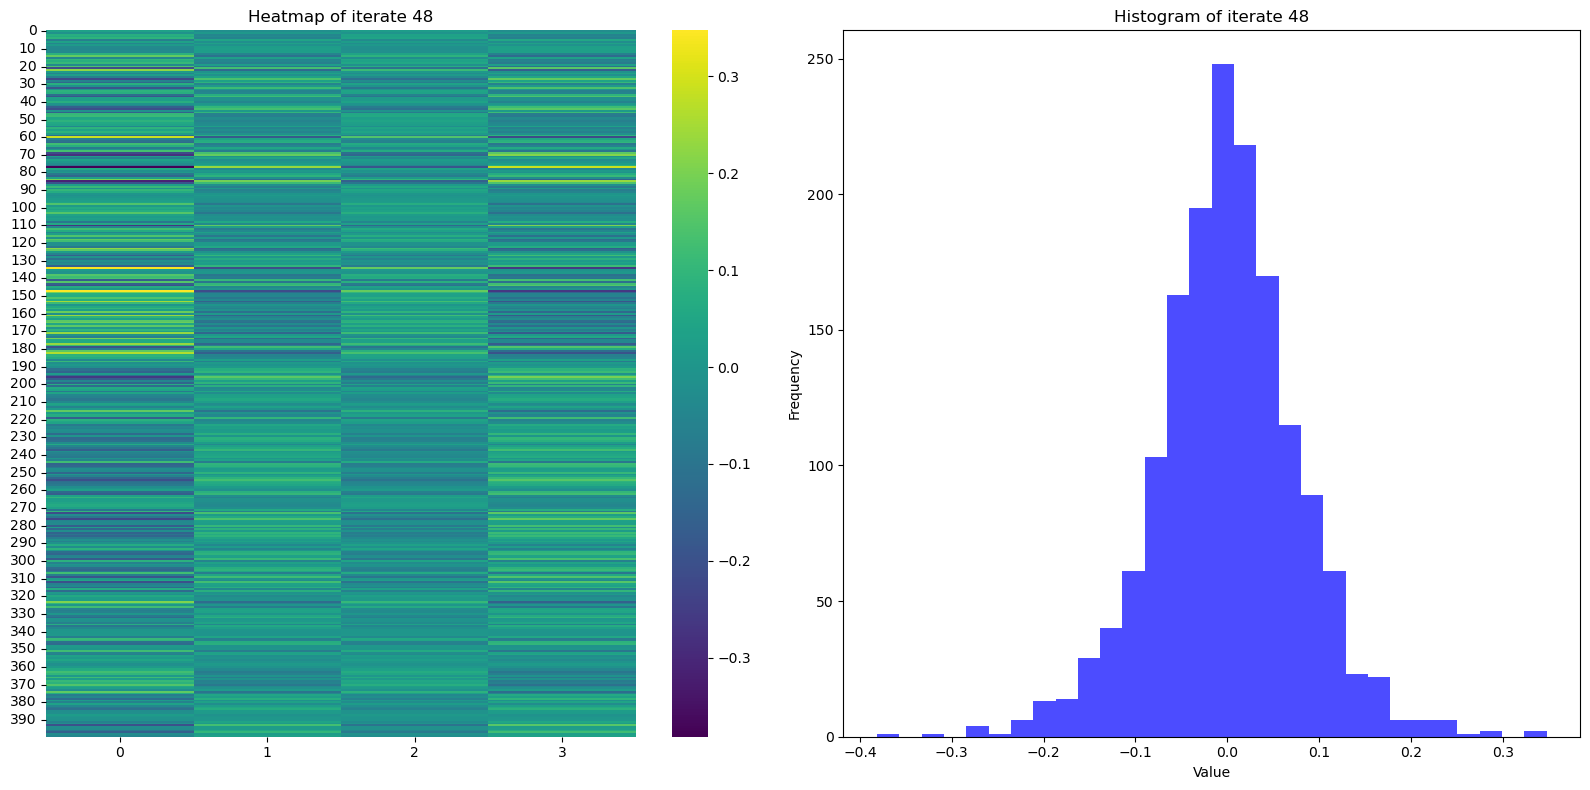

Energy of iterate 48: 3.1354738695965936


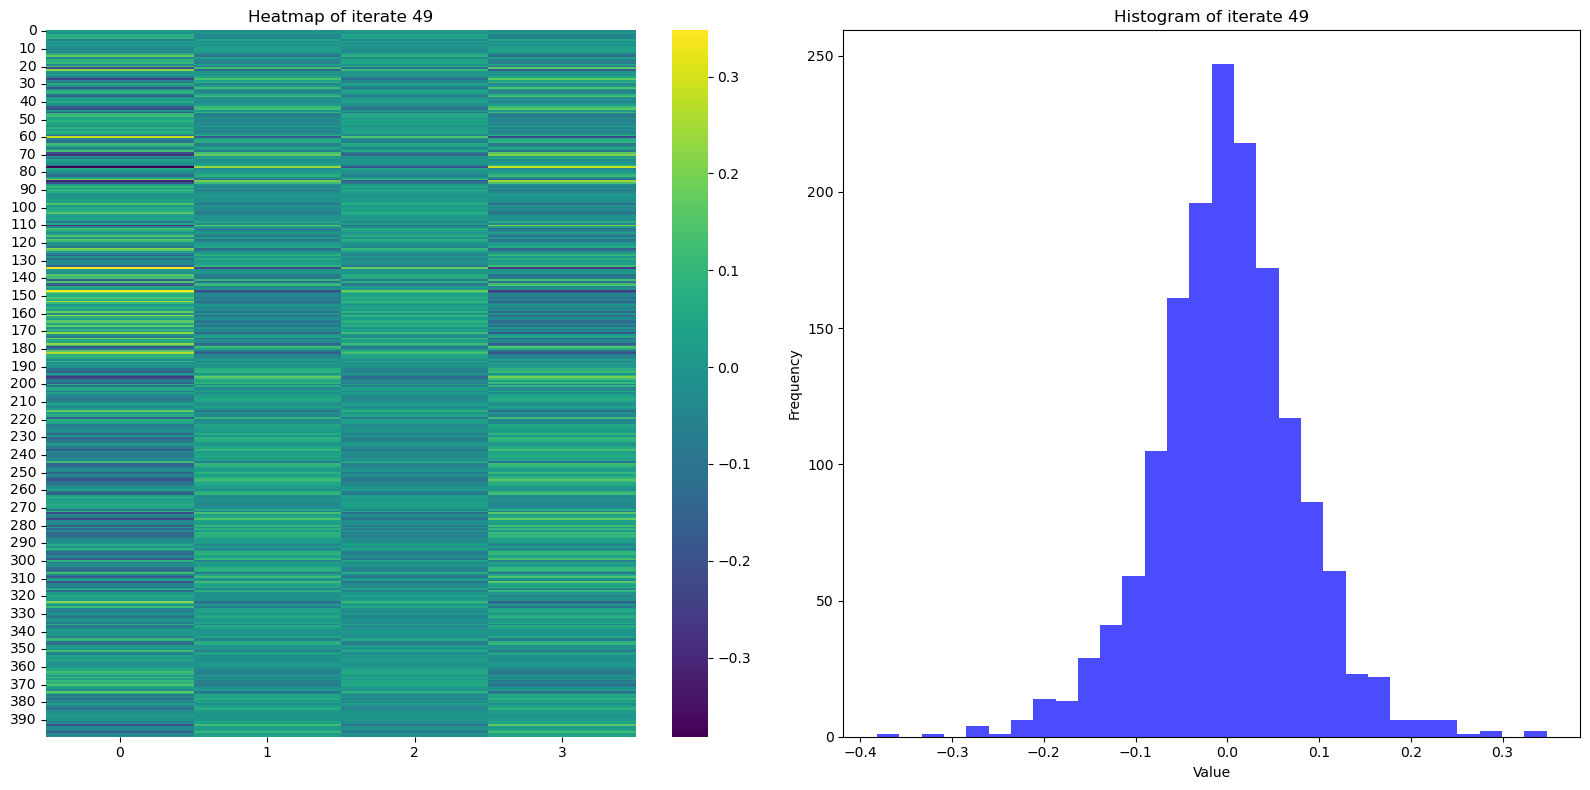

Energy of iterate 49: 3.137447550361831


1

In [51]:
## Looking at the factor matrices
separation_rank = 2
tucker_ranks = [4,4]
max_iter = 50

for i in range(max_iter):
    # Get the matrix
    iterate = iterate_level_values[0][1][i]
    
    # Create a figure with 2 subplots: one for the heatmap and one for the histogram
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot the heatmap on the first subplot
    sns.heatmap(iterate, cmap='viridis', cbar=True, ax=ax[0])
    ax[0].set_title(f'Heatmap of iterate {i}')
    
    # Plot the histogram on the second subplot
    ax[1].hist(iterate.flatten(), bins=30, color='blue', alpha=0.7)
    ax[1].set_title(f'Histogram of iterate {i}')
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Frequency')
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # Calculate the energy of the matrix
    energy = np.linalg.norm(iterate,'fro')
    #energy = np.sum(np.abs(eigen_values)) 
    
    print(f'Energy of iterate {i}:', energy)
s
    